## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


# from sklearn.base import BaseEstimator, TransformerMixin
# 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, RANSACRegressor

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



import optuna


import tqdm
import joblib
import pickle
# serializd your object and svaes its binary form 

import shap


pd.set_option('display.max_columns', 70)
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

style.use('ggplot')
sns.set_palette('Set2')
# blue, orange, green

import warnings
warnings.filterwarnings('ignore')

## 2. Initial Inspection

In [3]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('x_test.csv')

In [4]:
train_df = train.copy()
test_df = test.copy()

In [5]:
print(train_df.shape)
print(test_df.shape)

(75757, 64)
(9705, 63)


#### Independent features

id: building id

Year_Factor: anonymized year in which the weather and energy usage factors were observed

State_Factor: anonymized state in which the building is located

building_class: building classification

facility_type: building usage type

floor_area: floor area (in square feet) of the building

year_built: year in which the building was constructed

energy_star_rating: the energy star rating of the building

ELEVATION: elevation of the building location

january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building

january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building

january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building

cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

precipitation_inches: annual precipitation in inches at the location of the building

snowfall_inches: annual snowfall in inches at the location of the building

snowdepth_inches: annual snow depth in inches at the location of the building

avg_temp: average temperature over a year at the location of the building

days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building

days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building

days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building

days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building

days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building

days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building

days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building

days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building

direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree
compass point directions (e.g. 360 = north, 180 = south, etc.).

direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

max_wind_speed: maximum wind speed at the location of the building

days_with_fog: number of days with fog at the location of the building

#### Target feature 

site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

In [7]:
train_df.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [8]:
train_df.rename(columns={
    'Year_Factor': 'year_factor', 
    'State_Factor': 'state_factor',
    'ELEVATION': 'elevation',
    'id': 'building_id'
}, inplace=True)

test_df.rename(columns={
    'Year_Factor': 'year_factor', 
    'State_Factor': 'state_factor',
    'ELEVATION': 'elevation',
    'id': 'building_id'
}, inplace=True)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year_factor                75757 non-null  int64  
 1   state_factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   elevation                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [10]:
train_df.describe()

year_factor    floor_area    year_built  energy_star_rating  \
count  75757.000000  7.575700e+04  73920.000000        49048.000000   
mean       4.367755  1.659839e+05   1952.306764           61.048605   
std        1.471441  2.468758e+05     37.053619           28.663683   
min        1.000000  9.430000e+02      0.000000            0.000000   
25%        3.000000  6.237900e+04   1927.000000           40.000000   
50%        5.000000  9.136700e+04   1951.000000           67.000000   
75%        6.000000  1.660000e+05   1977.000000           85.000000   
max        6.000000  6.385382e+06   2015.000000          100.000000   

          elevation  january_min_temp  january_avg_temp  january_max_temp  \
count  75757.000000      75757.000000      75757.000000      75757.000000   
mean      39.506323         11.432343         34.310468         59.054952   
std       60.656596          9.381027          6.996108          5.355458   
min       -6.400000        -19.000000         10.806452         42.000000   
25%       11.900000          6.000000         29.827586         56.000000   
50%       25.000000         11.000000         34.451613         59.000000   
75%       42.700000         13.000000         37.322581         62.000000   
max     1924.500000         49.000000         64.758065         91.000000   

       february_min_temp  february_avg_temp  february_max_temp  \
count       75757.000000       75757.000000       75757.000000   
mean           11.720567          35.526837          58.486278   
std            12.577272           8.866697           8.414611   
min           -13.000000          13.250000          38.000000   
25%             2.000000          31.625000          55.000000   
50%             9.000000          34.107143          61.000000   
75%            20.000000          40.879310          62.000000   
max            48.000000          65.107143          89.000000   

       march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
count    75757.000000    75757.000000    75757.000000    75757.000000   
mean        21.606281       44.469292       70.897831       32.037171   
std         10.004303        6.657142        7.680982        5.577279   
min         -9.000000       25.854839       53.000000       15.000000   
25%         13.000000       38.096774       62.000000       26.000000   
50%         25.000000       44.516129       71.000000       32.000000   
75%         27.000000       49.354839       78.000000       37.000000   
max         52.000000       69.758065       95.000000       52.000000   

       april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  \
count    75757.000000    75757.000000  75757.000000  75757.000000   
mean        53.784863       82.661932     44.706179     63.742547   
std          2.500473        4.101028      4.200319      2.792919   
min         40.280000       62.000000     23.000000     46.950000   
25%         52.333333       80.000000     42.000000     62.790323   
50%         53.333333       82.000000     45.000000     62.887097   
75%         54.766667       87.000000     49.000000     65.096774   
max         74.500000      104.000000     58.000000     82.112903   

       may_max_temp  june_min_temp  june_avg_temp  june_max_temp  \
count  75757.000000   75757.000000   75757.000000   75757.000000   
mean      88.987856      51.131763      71.066384      91.400280   
std        2.864669       3.415926       2.861681       3.604068   
min       64.000000      30.000000      54.100000      67.000000   
25%       88.000000      50.000000      70.983333      89.000000   
50%       89.000000      52.000000      72.250000      90.000000   
75%       91.000000      53.000000      72.450000      94.000000   
max      112.000000      68.000000      89.550000     119.000000   

       july_min_temp  july_avg_temp  july_max_temp  august_min_temp  \
count   75757.000000   75757.000000   75757.000000     75757.000000   
mean       60.571604      76.596879      95.

In [11]:
numerical_feature = [feature for feature in train_df.columns if train_df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(train_df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in train_df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 61
Discrete feature Count 6
Continuous feature Count 55
Categorical feature Count 3


In [12]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [13]:
print([col for col in train_df if train_df[col].nunique()==1])
print([col for col in test_df if test_df[col].nunique()==1])

[]
['year_factor', 'days_above_110F']


In [14]:
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the thw columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
    

In [15]:
print("Train set columns with null values: ")
print(list(train_df.columns[train_df.isnull().any()]))
print('===========================================')
# Missing values for training data
missing_values_train = missing_values_table(train_df)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Train set columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
Your selected dataframe has 64 columns.
There are 6 columns that have missing values.


In [16]:
print("Test set columns with null values: ")
print(list(test_df.columns[test_df.isnull().any()]))
print('===========================================')
# Missing values for training data
missing_values_train = missing_values_table(test_df)
missing_values_train[:20].style.background_gradient(cmap='Reds')

Test set columns with null values: 
['year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']
Your selected dataframe has 63 columns.
There are 6 columns that have missing values.


In [17]:
test_df[['year_factor', 'days_above_110F']]

year_factor  days_above_110F
0               7                0
1               7                0
2               7                0
3               7                0
4               7                0
...           ...              ...
9700            7                0
9701            7                0
9702            7                0
9703            7                0
9704            7                0

[9705 rows x 2 columns]

### Observations after Initial Inspection

- There are total 64 columns and 75757 samples, out of which 61 columns are numerical and 3 columns are categorical in nature
- Target column i.e. site_eui is a continuous numerical feature
- 'year_built', 'energy_star_rating', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog' are the features with null values in both training and test set
- Test set has two columns year_factor and days_above_110F which has constant values

## 3. Exploratory Data Analysis

- Combining dataset for visualizations

In [18]:
test['site_eui'] = np.nan #63
test['dataset'] = 'test'
train['dataset'] = 'train'


# train = commondf["dataset"]  == "train"

df_all = pd.concat([train, test], axis=0, ignore_index=True)

In [19]:
df_all.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

### 3.1 Analyzing each column independently 

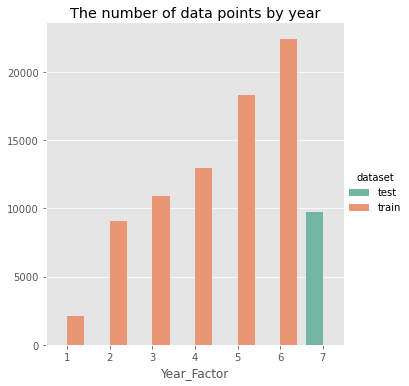

In [20]:
sns.catplot(x='Year_Factor',y='id',
            data=df_all.groupby(['dataset','Year_Factor']).agg({'id':'count'}).reset_index(),
            hue='dataset',
            kind='bar'
           ).set(title="The number of data points by year",
     ylabel=None)

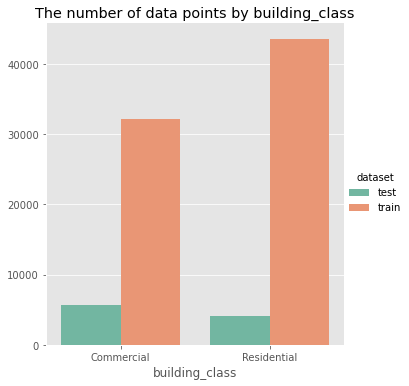

In [21]:
sns.catplot(x='building_class',y='id',
            data=df_all.groupby(['dataset','building_class']).agg({'id':'count'}).reset_index(),
            hue='dataset',
            kind='bar'
           ).set(title="The number of data points by building_class",
     ylabel=None)

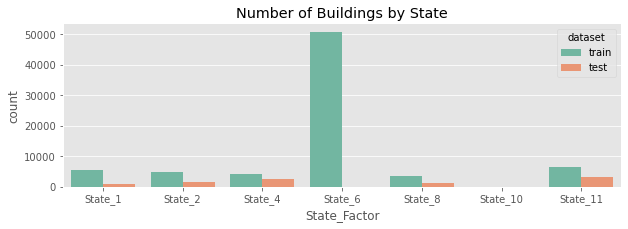

In [22]:
plt.figure(figsize=(10,3))
sns.countplot(x='State_Factor',data=df_all,hue='dataset')
plt.title('Number of Buildings by State')
plt.show()

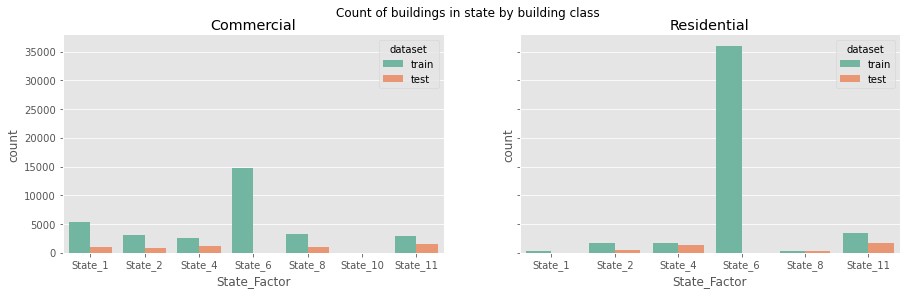

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,4),sharey=True)
fig.suptitle('Count of buildings in state by building class')

for i,j in enumerate(df_all['building_class'].unique()):
    plt.figure(figsize=(10,3))
    sns.countplot(x='State_Factor',data=df_all[df_all['building_class'] == j],hue='dataset',ax=ax[i])
    ax[i].set_title(j)  
                                            

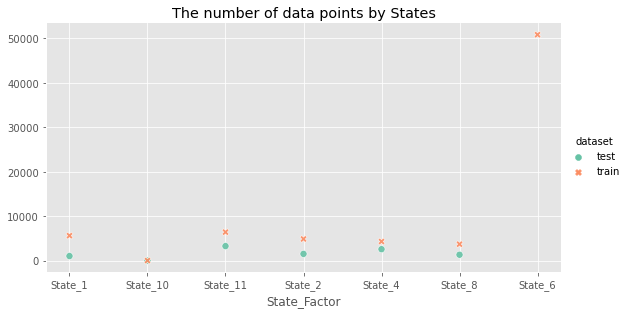

In [24]:
ax = sns.relplot(x='State_Factor', 
                 y='id', 
                 data=df_all.groupby(['dataset','State_Factor']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=2,
                 height=4,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by States",
    ylabel=None)

- Number of buildings have increased year on year (Year 1 to 6) as per the training dataset. In test dataset we have the data points for year 7 
- More datapoints for residential buildings have been recorded in train dataset. However, test dataset has more instances of commercial buildings
- Overall, Most of the training data for residential is recorded for State_6 with no instances in test set.Apart from State_6, all other states have more instances for the commercial buildings
- State_10 only consists of commercial buildings

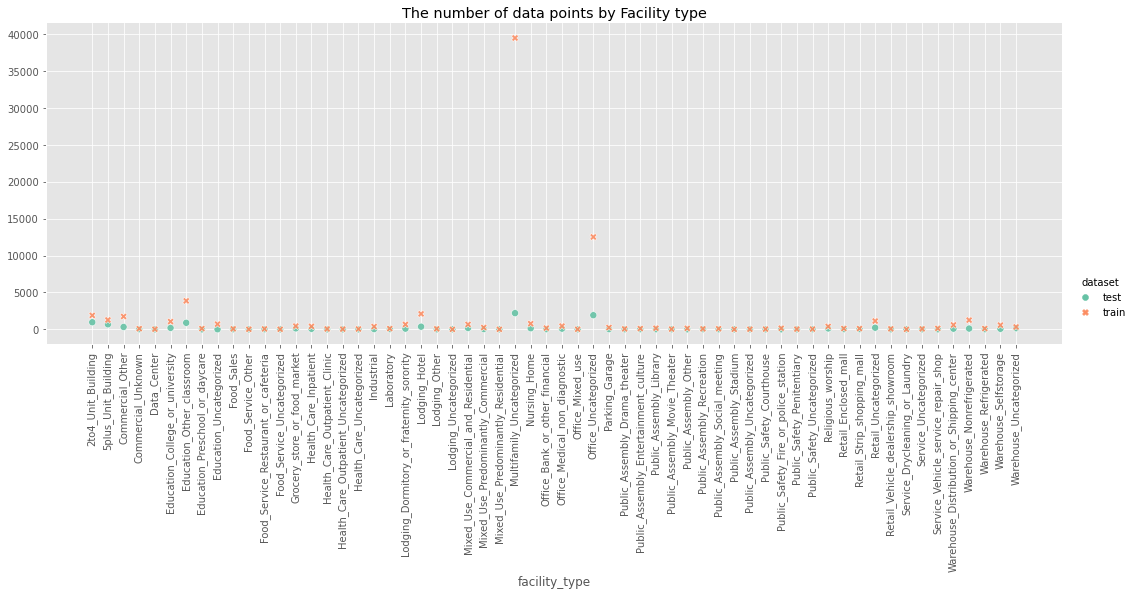

In [25]:
ax = sns.relplot(x='facility_type', 
                 y='id', 
                 data=df_all.groupby(['dataset','facility_type']).agg({'id':'count'}).reset_index(),
                 hue='dataset',
                 style='dataset',
                 aspect=3,
                 height=5,
                 s=50,
                 alpha=0.9
                )\
.set(title = "The number of data points by Facility type",
    ylabel=None)

ax.set_xticklabels(rotation=90) 

- Both test and train dataset has all the facility types
- Seems like Multifamily Uncategorized and Office Uncategorized facilities are from State_6 

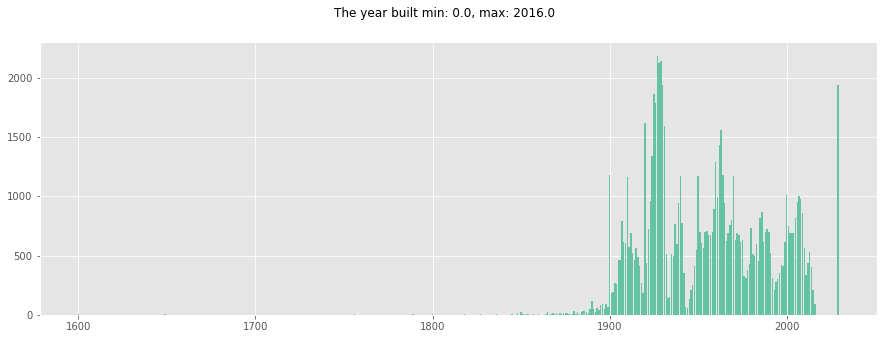

In [26]:
yearly_df = df_all[['year_built']].fillna(2029).replace({0:2029}).astype('category').value_counts().reset_index().rename({0:'count'},axis=1).sort_values('year_built')

fig,ax = plt.subplots(figsize=(15,5))

ax = plt.bar(yearly_df['year_built'],yearly_df['count'])

fig.suptitle(f"The year built min: {min(df_all['year_built'])}, max: {max(df_all['year_built'])}");

Most of the buildings are built after year 1900.The oldest building was built in year 1600 and latest building was built in 2016

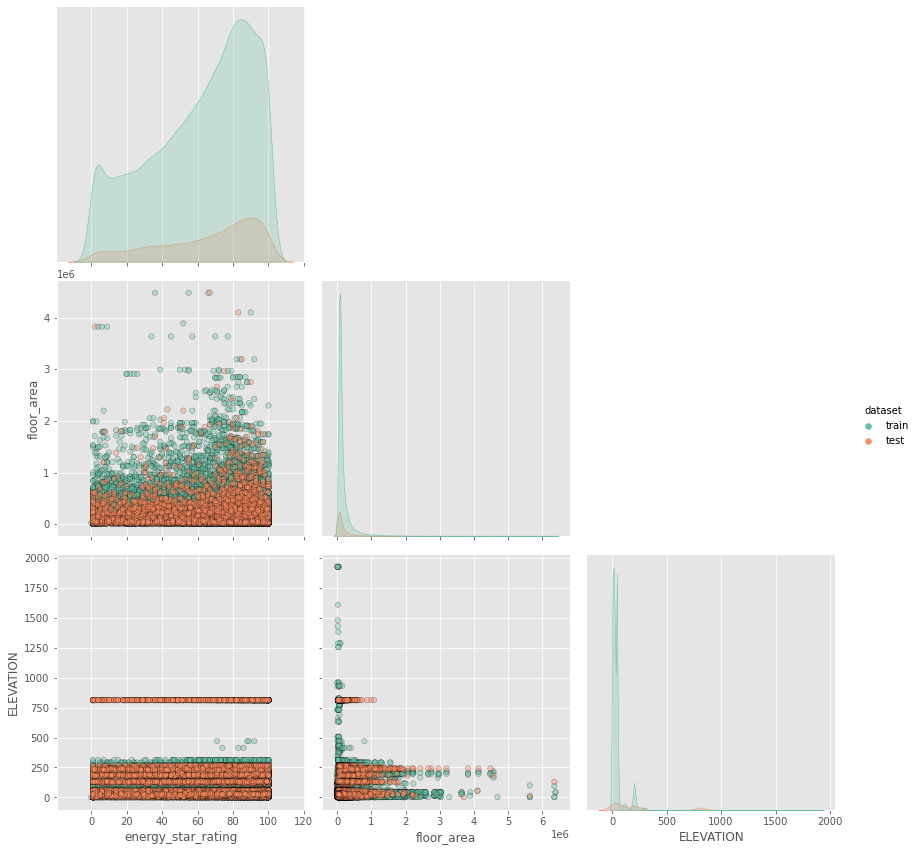

In [27]:
sns.pairplot(df_all,
            vars=['energy_star_rating','floor_area','ELEVATION'], 
            hue='dataset',
            height=4,
            plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
            corner=True
           );

Most of training dataset have higher floor_area and high energy rating as compared to test dataset

<AxesSubplot:xlabel='State_Factor', ylabel='avg_temp'>

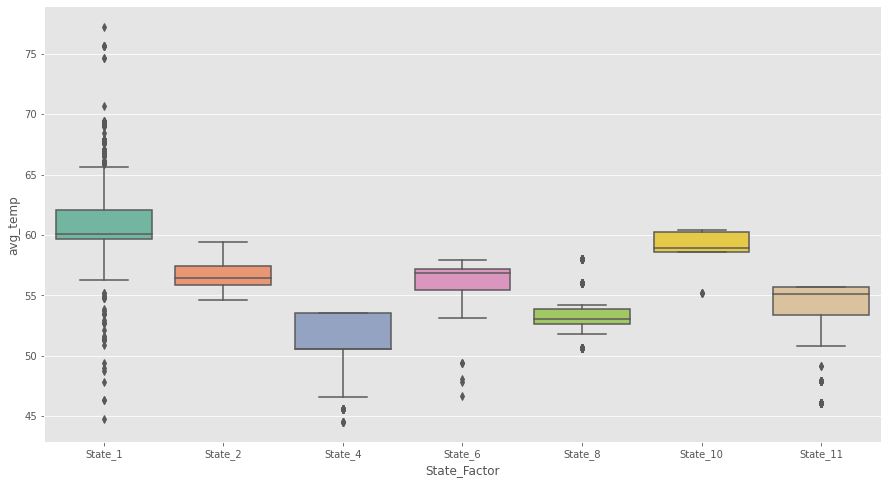

In [28]:
fig,ax = plt.subplots(figsize=(15,8))

sns.boxplot(data=df_all[['State_Factor','avg_temp']],x='State_Factor',y='avg_temp',palette='Set2')

<AxesSubplot:xlabel='State_Factor', ylabel='avg_temp'>

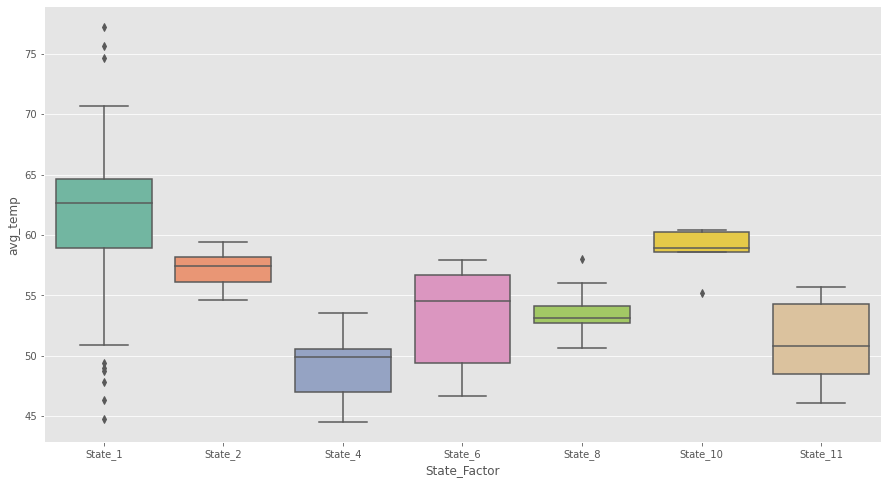

In [29]:
fig,ax = plt.subplots(figsize=(15,8))

sns.boxplot(data=df_all[['State_Factor','avg_temp']].drop_duplicates(),x='State_Factor',y='avg_temp',palette='Set2')

State_1,State_10,State_2 have comparatively higher avg temperature. While, State_1,11,4,6 have higher range of the avg temperature

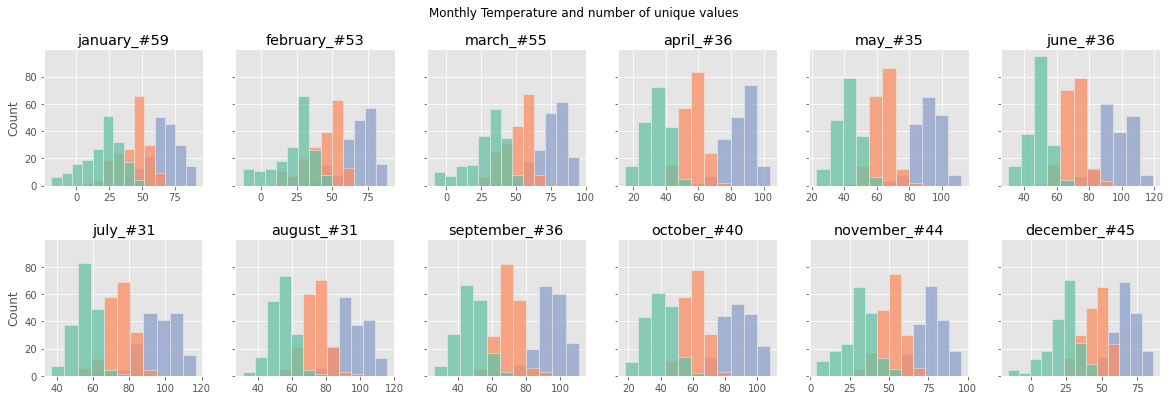

In [30]:
cols = [['january_min_temp', 'january_avg_temp', 'january_max_temp'],
        ['february_min_temp', 'february_avg_temp', 'february_max_temp'],
        ['march_min_temp', 'march_avg_temp', 'march_max_temp'], 
        ['april_min_temp','april_avg_temp', 'april_max_temp'], 
        ['may_min_temp', 'may_avg_temp','may_max_temp'], 
        ['june_min_temp', 'june_avg_temp', 'june_max_temp'],
        ['july_min_temp', 'july_avg_temp', 'july_max_temp'], 
        ['august_min_temp','august_avg_temp', 'august_max_temp'], 
        ['september_min_temp','september_avg_temp', 'september_max_temp'], 
        ['october_min_temp','october_avg_temp', 'october_max_temp'], 
        ['november_min_temp','november_avg_temp', 'november_max_temp'], 
        ['december_min_temp','december_avg_temp', 'december_max_temp']]


fig,ax = plt.subplots(2,6,figsize=(20,6),sharey=True)
fig.suptitle('Monthly Temperature and number of unique values')

for i,j in enumerate(cols):
    if i<=5:
        sns.histplot(data=df_all[j].drop_duplicates(),ax=ax[0,i],legend=False)\
        .set(title=j[0][:j[0].find('_')]+'_#'+str(len(df_all[j[0]].unique())))
        
    else:
        sns.histplot(data=df_all[j].drop_duplicates(),ax=ax[1,i-6],legend=False)\
        .set(title=j[0][:j[0].find('_')]+'_#'+str(len(df_all[j[0]].unique())))
        
plt.subplots_adjust(hspace=0.4)

Each month has unique temperature values between 31 and 59 which means the values in temperature volumes are highly repeated for the data points.

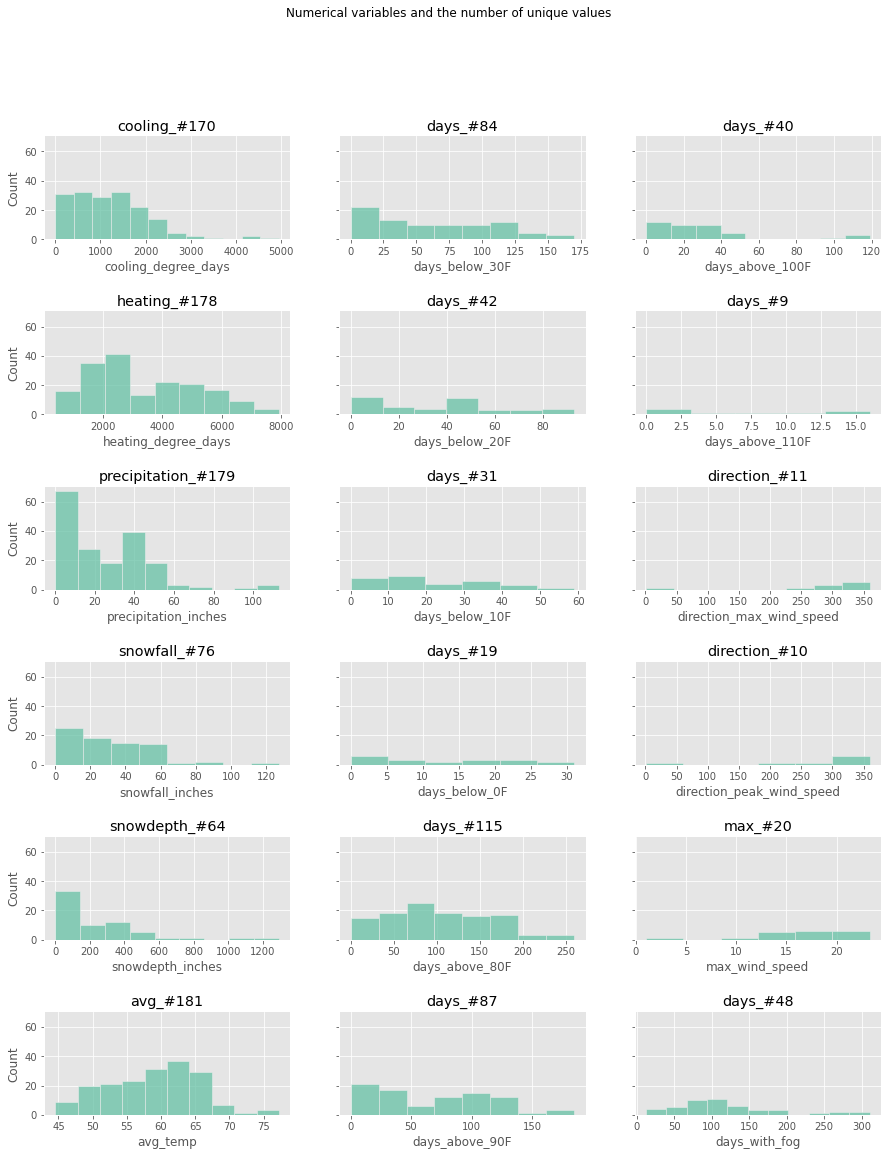

In [31]:
cols=['cooling_degree_days','heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

fig,ax = plt.subplots(6,3,figsize=(15,18),sharey=True)
fig.suptitle("Numerical variables and the number of unique values")

for i,j in enumerate(cols):
    if i<=5:
        sns.histplot(data=df_all[j].drop_duplicates(),ax=ax[i,0],legend=False)\
        .set(title=j[:j.find('_')]+'_#'+str(len(df_all[j].unique())))
        
    elif i>=6 and i<=11:
        sns.histplot(data=df_all[j].drop_duplicates(),ax=ax[i-6,1],legend=False)\
        .set(title=j[:j.find('_')]+'_#'+str(len(df_all[j].unique())))    
        
    else:
        sns.histplot(data=df_all[j].drop_duplicates(),ax=ax[i-12,2],legend=False)\
        .set(title=j[:j.find('_')]+'_#'+str(len(df_all[j].unique())))
        
plt.subplots_adjust(hspace=0.7)


- Average temperature for most of the buildings are around 60-65 deg F
- Most of the days temperature have remained above 80 deg F
- Weather Conditions remains hot on most days as compared to colder and rainy days
- As usual, the unique values are less 

### 3.2 Analyzing features w.r.t target column

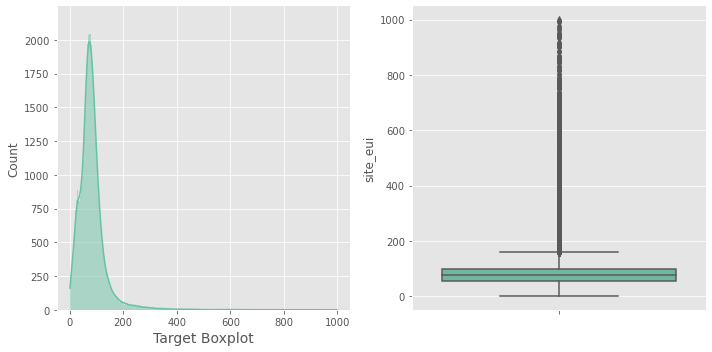

In [32]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
sns.histplot(x=df_all['site_eui'],kde=True)
ax1.set_xlabel('Target Histogram',fontsize=14)

ax2 = plt.subplot(1,2,2)
sns.boxplot(y=df_all['site_eui'])
ax1.set_xlabel('Target Boxplot',fontsize=14)
plt.tight_layout()

- Site EUI values mostly lies between 0 to 200 with some values exceeding beyond, with the curve being heavily right skewed

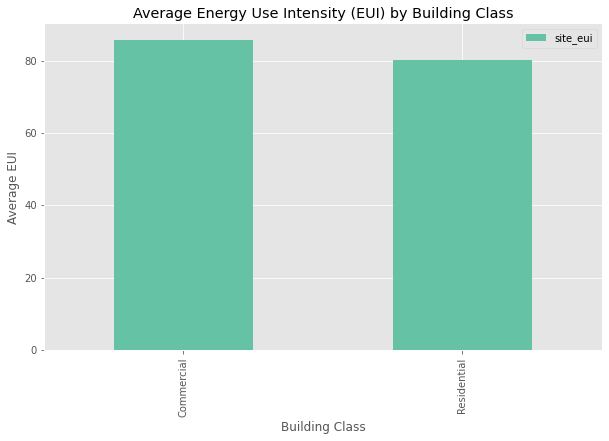

In [33]:
average_eui_by_class = df_all[['building_class','site_eui']].groupby('building_class').mean('site_eui')
average_eui_by_class.plot(kind='bar', figsize=(10,6))

plt.title('Average Energy Use Intensity (EUI) by Building Class')
plt.xlabel('Building Class')
plt.ylabel('Average EUI')


plt.show()

- Commercial buildings are responsible for slightly higher average EUI as compared to residential buildings

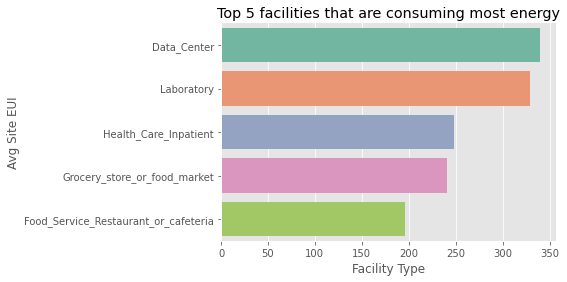

In [34]:
avg_energy_consumed_by_facilities = df_all[['facility_type','site_eui']].groupby('facility_type').mean('site_eui')
facilities_consuming_most_energy = avg_energy_consumed_by_facilities.sort_values(by='site_eui',ascending=False)
facilities_consuming_most_energy = facilities_consuming_most_energy.reset_index().head()

sns.barplot(y='facility_type', x='site_eui',data=facilities_consuming_most_energy)
plt.title('Top 5 facilities that are consuming most energy')
plt.xlabel('Facility Type')
plt.ylabel('Avg Site EUI')
plt.show()

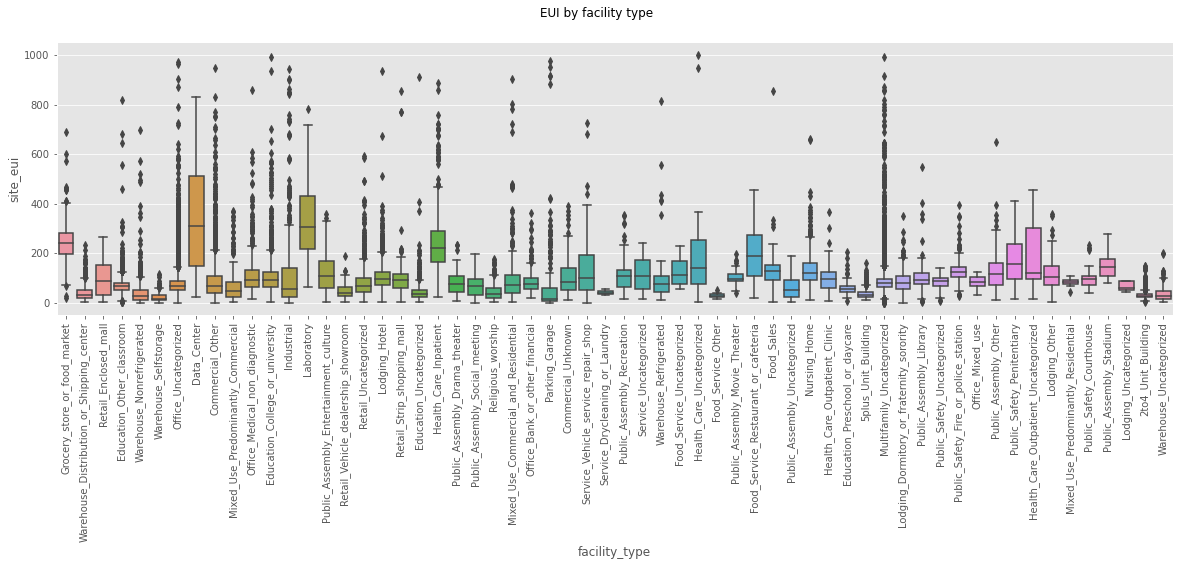

In [35]:
fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle("EUI by facility type")
ax=sns.boxplot(data=df_all, y='site_eui', x='facility_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

- Data Centers and Laboratories contribute to highest average EUI out of all facilities due to emissions caused due to chemicals and R&D stuffs
- All the essential services such as grocery stores,heath care inpatient, restaurants produce higher range of EUI as they work for longer hours


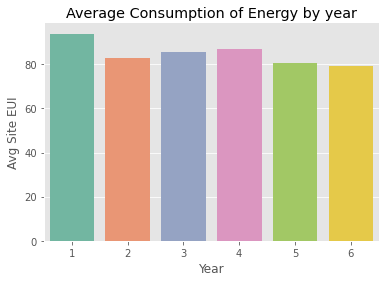

In [36]:
avg_eui_by_year = train_df[['year_factor','site_eui']].groupby('year_factor').mean('site_eui')
avg_eui_by_year = avg_eui_by_year.reset_index()
sns.barplot(x='year_factor', y='site_eui',data=avg_eui_by_year)
plt.title('Average Consumption of Energy by year')
plt.xlabel('Year')
plt.ylabel('Avg Site EUI')
plt.show()

- Overall the average site EUI for all the years has been around or above 80 levels. Year 1 accounted EUI for nearly 90 levels 

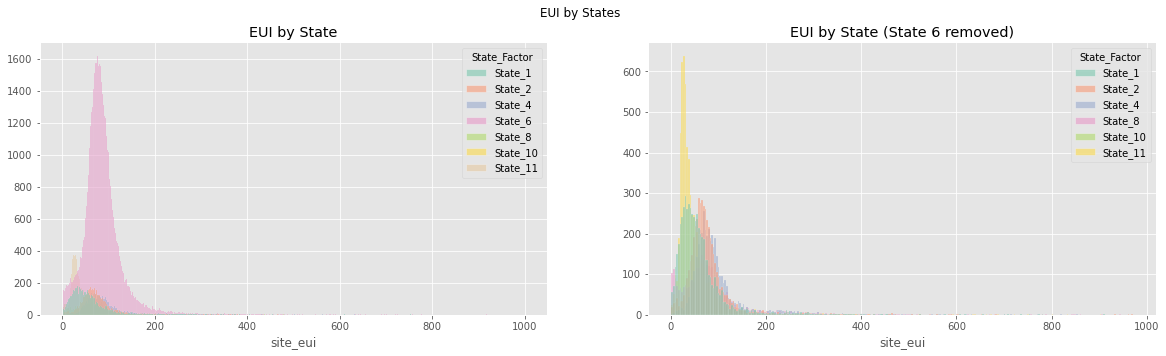

In [37]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
fig.suptitle("EUI by States")

sns.histplot(df_all, x='site_eui',hue='State_Factor', ax=ax[0])\
.set(title='EUI by State', ylabel=None)

sns.histplot(df_all[df_all['State_Factor']!='State_6'], x='site_eui', hue='State_Factor', ax=ax[1])\
.set(title='EUI by State (State 6 removed)', ylabel=None);

- State_2 and State_4 accounted for slightly higher EUI and State_8 and State_11 have lower EUI levels

In [38]:
monthly_temp_cols = [feature for feature in df_all.columns if feature[-4:] == 'temp' and feature != 'avg_temp' ]

In [39]:
def plot_scatter_by_month(month_min,month_avg,month_max,feature,hue):
    
    data1 = df_all[month_min]
    data2 = df_all[month_avg]
    data3 = df_all[month_max]
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
    
    sns.scatterplot(x=data1,y=df_all[feature],ax=axes[0],hue=df_all[hue])
    axes[0].set_title(f'Distribution of {month_min}')

    sns.scatterplot(x=data2,y=df_all[feature],ax=axes[1],hue=df_all[hue])
    axes[1].set_title(f'Distribution of {month_avg}')
        
    sns.scatterplot(x=data3,y=df_all[feature],ax=axes[2],hue=df_all[hue])
    axes[2].set_title(f'Distribution of {month_max}')
    
    plt.show()

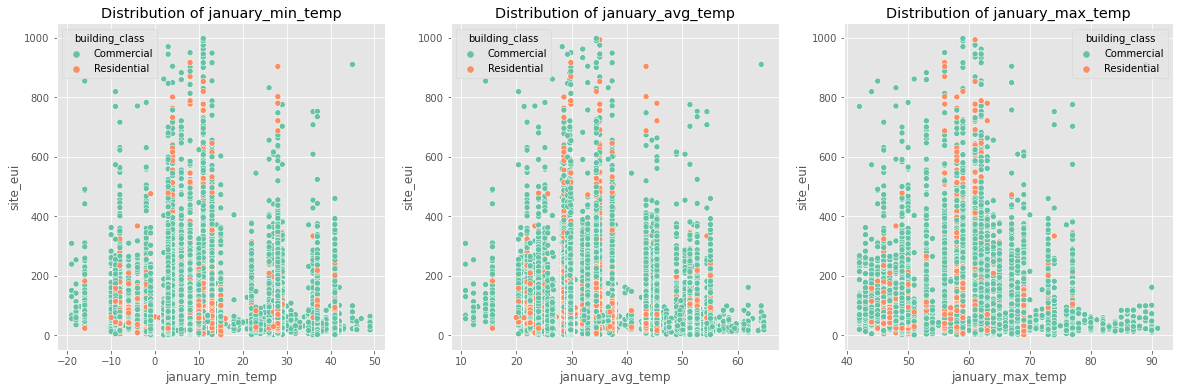

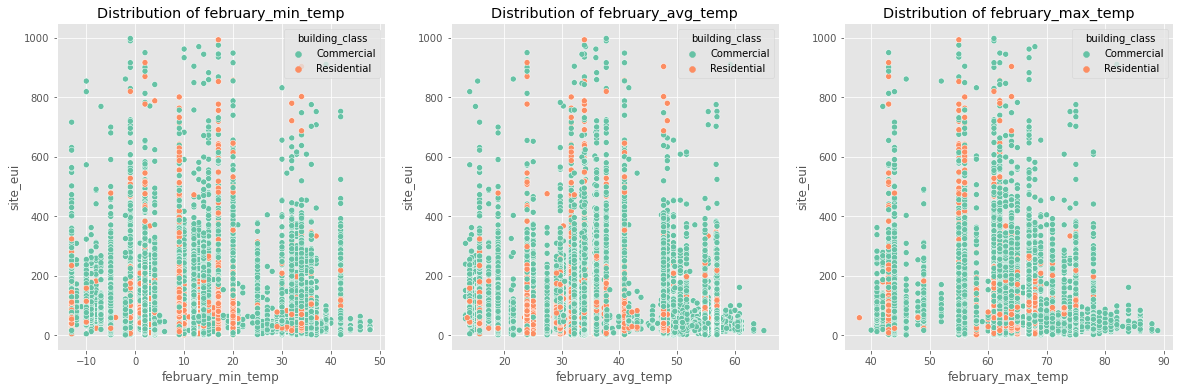

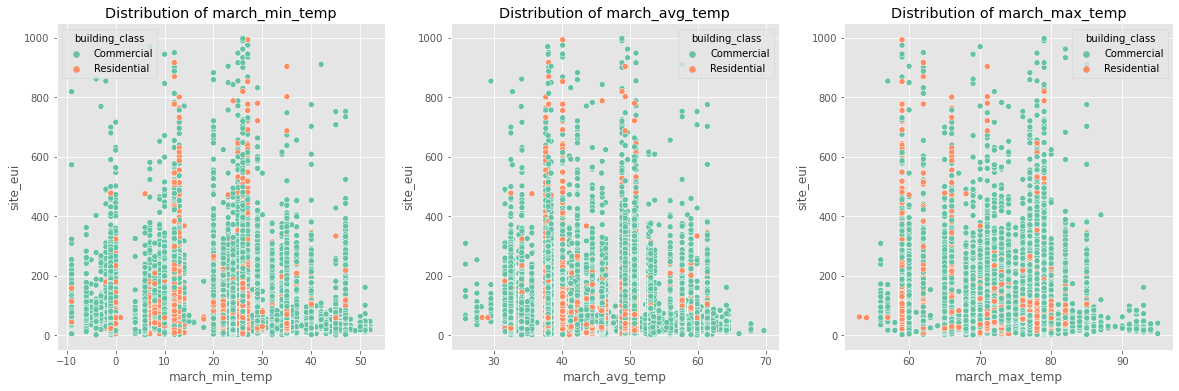

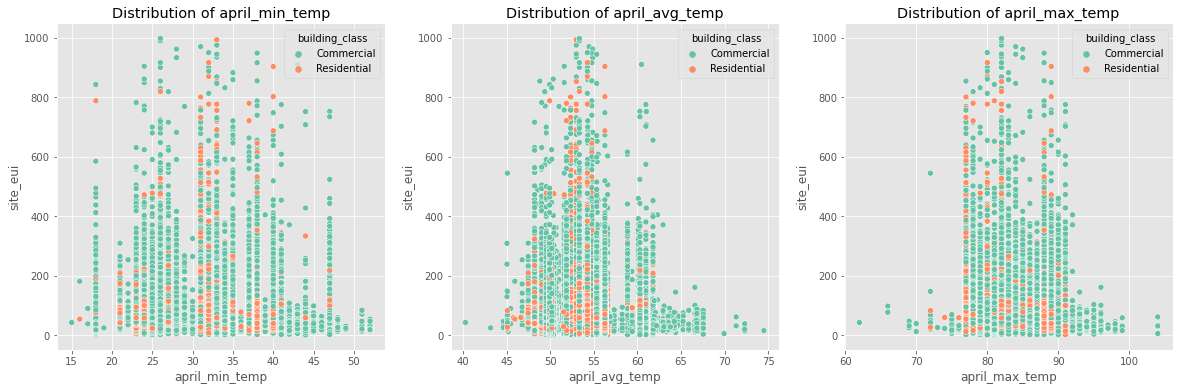

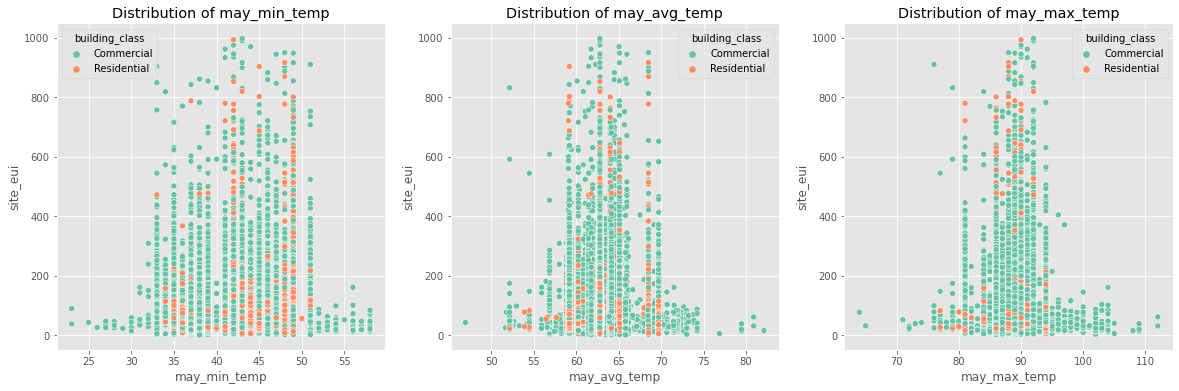

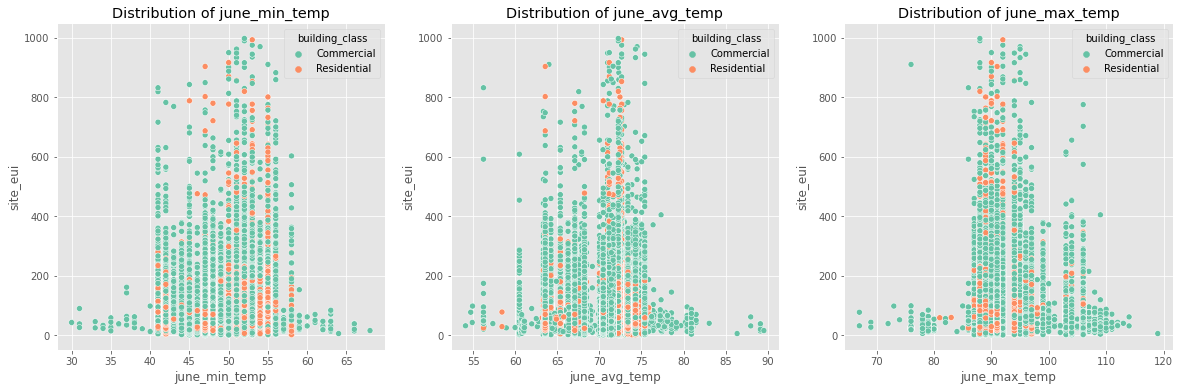

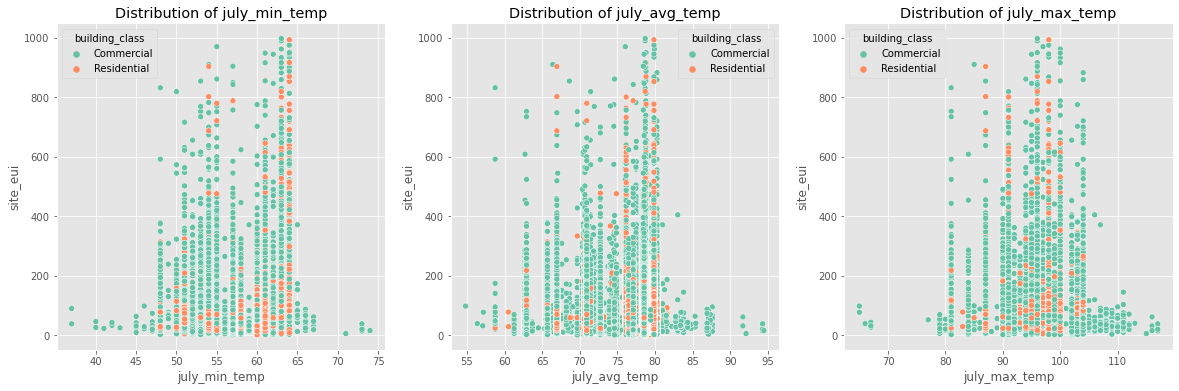

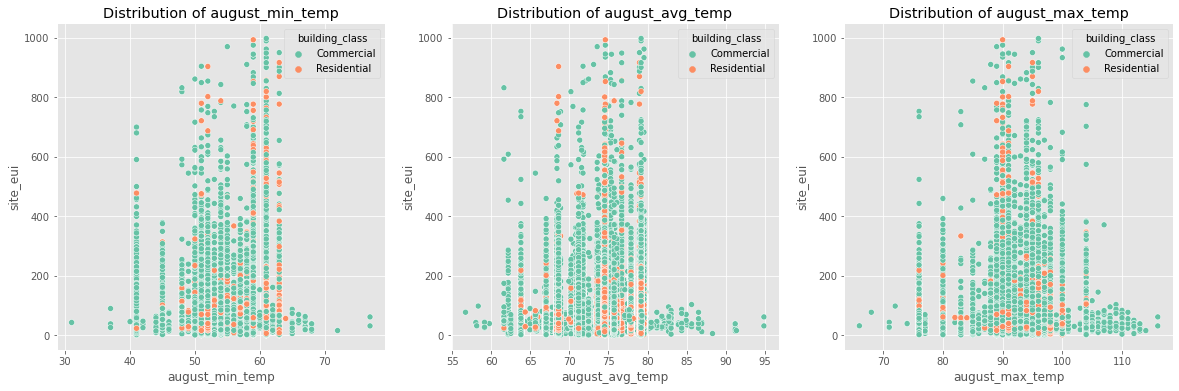

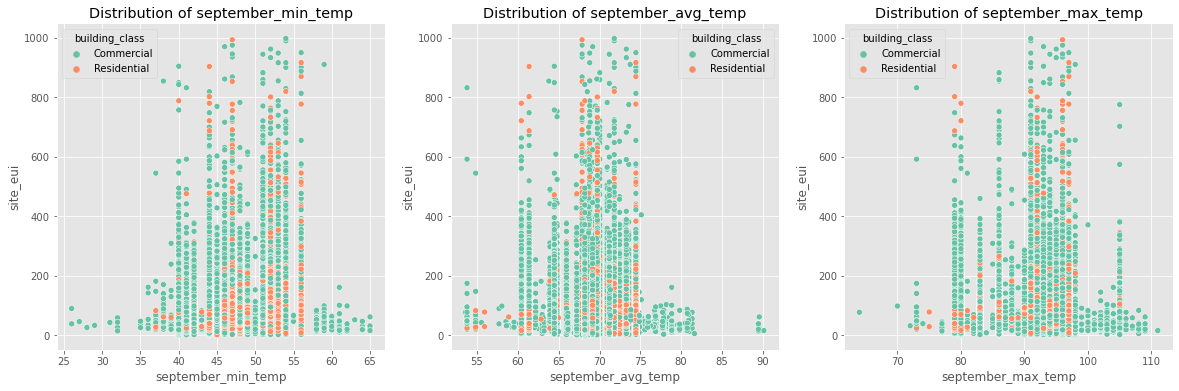

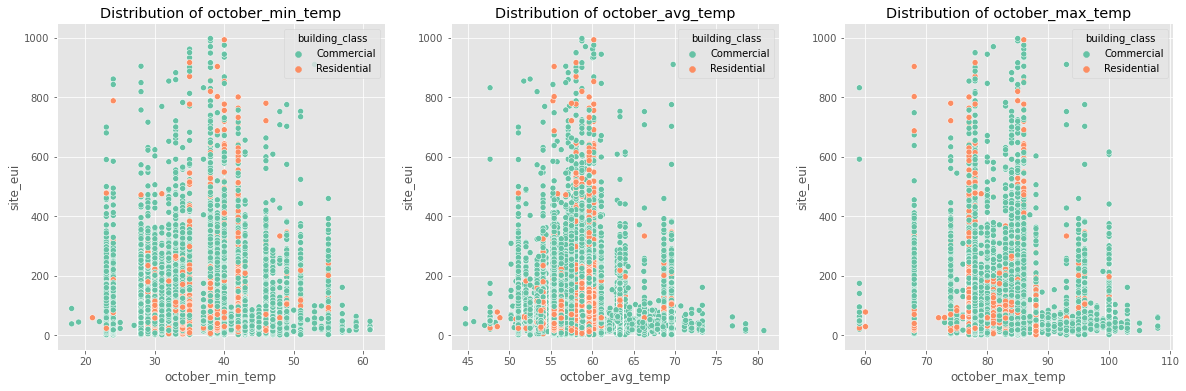

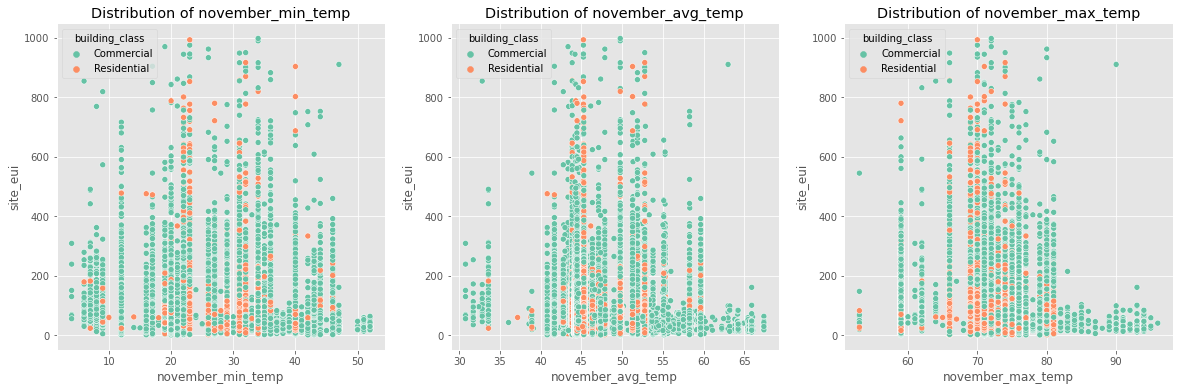

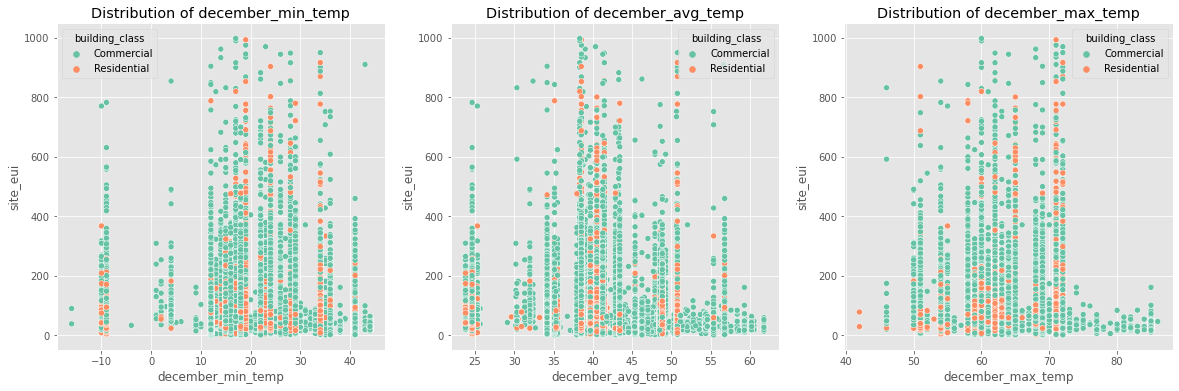

In [40]:
for i in range(0, len(monthly_temp_cols), 3):
    
    col1, col2, col3 = monthly_temp_cols[i:i+3]
    plot_scatter_by_month(col1, col2, col3,'site_eui',hue='building_class')

- Monthly temperature data doesn't seem to correlate direct with Site EUI
- Dip in minimum temperature can be seen in December, January and February where the site eui seems to be maximum  in between 10-20 deg F
- As the season progresses towards summer the maximum temperature also starts increasing with peak site EUI observed in range of 90-100 deg F

<AxesSubplot:xlabel='avg_temp', ylabel='site_eui'>

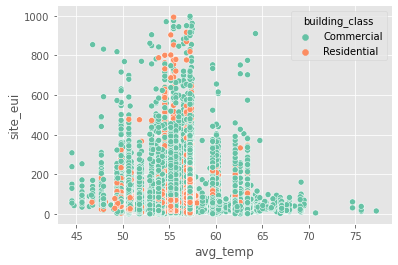

In [41]:
sns.scatterplot(df_all['avg_temp'],df_all['site_eui'],hue=df_all['building_class'])

<AxesSubplot:xlabel='floor_area', ylabel='site_eui'>

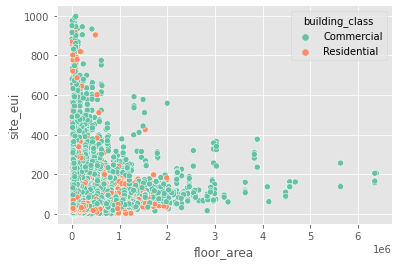

In [42]:
sns.scatterplot(df_all['floor_area'],df_all['site_eui'],hue=df_all['building_class'])

- Site EUI seems to be decreasing with more floor area

<AxesSubplot:xlabel='ELEVATION', ylabel='site_eui'>

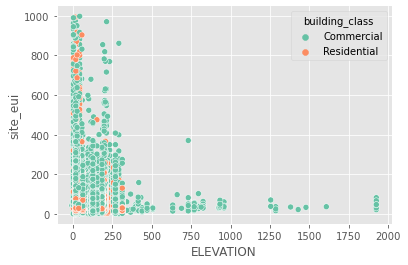

In [43]:
sns.scatterplot(df_all['ELEVATION'],df_all['site_eui'],hue=df_all['building_class'])

<AxesSubplot:xlabel='energy_star_rating', ylabel='site_eui'>

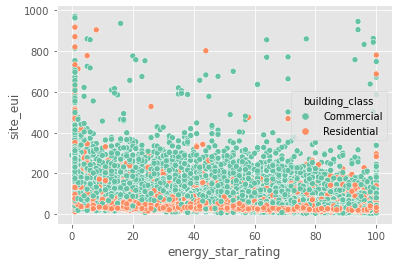

In [44]:
sns.scatterplot(df_all['energy_star_rating'],df_all['site_eui'],hue=df_all['building_class'])

- Site EUI decreases with more energy star rating

In [45]:
days_below = ['days_below_30F','days_below_20F','days_below_10F','days_below_0F']

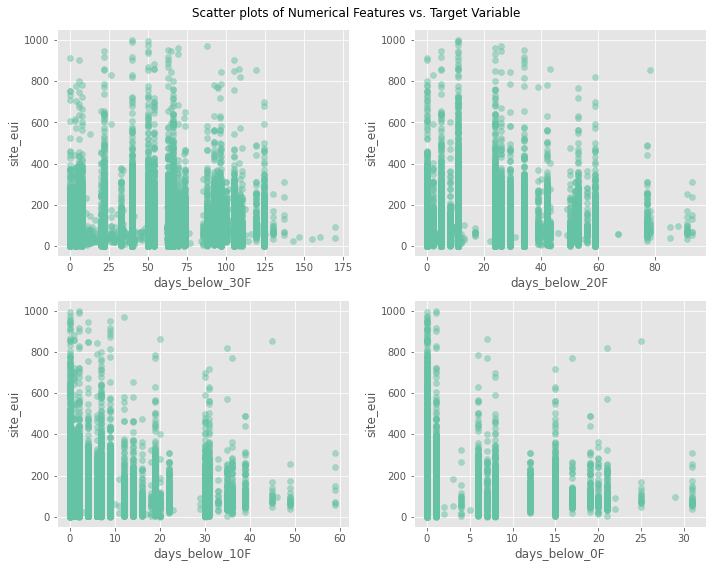

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create a scatter plot for each numerical feature
for i, feature in enumerate(days_below):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(df_all[feature], df_all['site_eui'], alpha=0.5)
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel('site_eui')

# Add a main title to the plot
fig.suptitle('Scatter plots of Numerical Features vs. Target Variable')

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

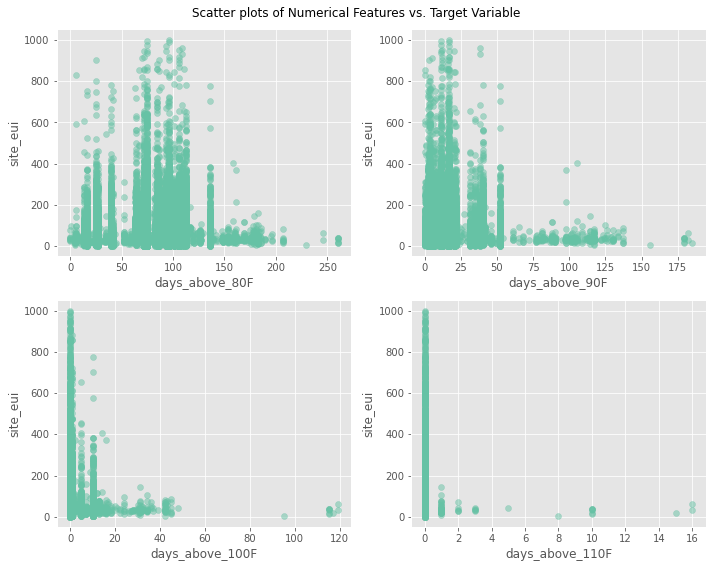

In [47]:
days_above = ['days_above_80F','days_above_90F','days_above_100F','days_above_110F']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create a scatter plot for each numerical feature
for i, feature in enumerate(days_above):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(df_all[feature], df_all['site_eui'], alpha=0.5)
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel('site_eui')

# Add a main title to the plot
fig.suptitle('Scatter plots of Numerical Features vs. Target Variable')

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

##### Overall Observations 

- There seems to be no correlation or minimal relation between the site eui and the weather and temperature features
- All three categorical features are useful in predicting site_eui
- Target column (site_eui) is right skewed and has outliers. We can use the log transform but it may affect the prediction
- Building specifications related features i.e. floor_area, energy_star_rating, Elevation are related to the target feature
- There might be a lot of multicollinear features, specially weather and temperature features. Some feature engineering might be required and then need to remove some multicollinear features

In [48]:
df_all.head(2)

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016129                83                 43   

   november_avg_temp  november_max_temp  december_min_temp  december_avg_temp  \
0               53.8                 72                 36          49.274194   
1               53.8                 72                 36          49.274194   

   december_max_temp  cooling_degree_days  heating_degree_days  \
0                 71                  115                 2960   
1                 71                  115                 2960   

   precipitation_inches  snowfall_inches  snowdepth_inches   avg_temp  \
0                 16.59              0.0                 0  56.972603   
1                 16.59              0.0                 0  56.972603   

   days_below_30F  days_below_20F  days_below_10F  days_below_0F  \
0               0               0               0              0   
1               0               0               0              0   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   

   days_with_fog    site_eui  id dataset  
0            NaN  248.682615   0   train  
1           12.0   26.500150   1   train

### 4. Pre-Processing and Feature Engineering 

1. Need to impute columns with null values
2. Encode categorical features
3. Handle multicollinear features

In [49]:
cleaned_data = df_all.copy()

### 4.1 Handling Null values

In [50]:
100.0 * cleaned_data.isna().mean()

Year_Factor        0.000000
State_Factor       0.000000
building_class     0.000000
facility_type      0.000000
floor_area         0.000000
                    ...    
max_wind_speed    58.104187
days_with_fog     64.254288
site_eui          11.355924
id                 0.000000
dataset            0.000000
Length: 65, dtype: float64

In [51]:
cols_with_nulls = [feature for feature in cleaned_data.columns if cleaned_data[feature].isna().sum() > 0]

In [52]:
cols_with_nulls

['year_built',
 'energy_star_rating',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog',
 'site_eui']

In [53]:
for feat in cols_with_nulls:
    print(cleaned_data[feat].value_counts())

1927.0    2184
1929.0    2141
1928.0    2125
1930.0    1937
1925.0    1864
          ... 
1862.0       1
1811.0       1
1732.0       1
1799.0       1
1833.0       1
Name: year_built, Length: 183, dtype: int64
100.0    2198
1.0      1097
89.0      927
84.0      924
85.0      912
         ... 
16.0      284
11.0      284
12.0      282
10.0      272
0.0         1
Name: energy_star_rating, Length: 101, dtype: int64
1.0      27724
330.0     3187
310.0     2696
360.0      929
350.0      485
340.0      394
320.0      218
280.0      153
270.0       12
300.0        7
Name: direction_max_wind_speed, dtype: int64
1.0      27699
340.0     3196
360.0     1446
310.0     1260
320.0      832
240.0      192
350.0      179
270.0      143
330.0      129
Name: direction_peak_wind_speed, dtype: int64
1.0     27724
18.3     3250
13.0     1260
17.0      934
19.2      882
13.4      489
17.4      332
20.6      277
14.8      192
17.9      179
16.5      132
20.1       65
23.3       52
12.5       12
22.8       10

In [54]:
cleaned_data['year_built'] = cleaned_data['year_built'].fillna(cleaned_data['year_built'].median())
cleaned_data['energy_star_rating'] = cleaned_data['energy_star_rating'].fillna(cleaned_data['energy_star_rating'].median())
cleaned_data['direction_max_wind_speed'] = cleaned_data['direction_max_wind_speed'].fillna(cleaned_data['direction_max_wind_speed'].mode()[0])
cleaned_data['direction_peak_wind_speed'] = cleaned_data['direction_peak_wind_speed'].fillna(cleaned_data['direction_peak_wind_speed'].mode()[0])
cleaned_data['max_wind_speed'] = cleaned_data['max_wind_speed'].fillna(cleaned_data['max_wind_speed'].mode()[0])
cleaned_data['days_with_fog'] = cleaned_data['days_with_fog'].fillna(cleaned_data['days_with_fog'].median())

In [55]:
cleaned_data['site_eui'] = cleaned_data['site_eui'].fillna(cleaned_data['site_eui'].median())

In [56]:
cleaned_data.isnull().sum().sum()

0

In [57]:
cleaned_data.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [58]:
cleaned_data.drop(columns=['id'],axis=1,inplace=True)

In [59]:
cleaned_data.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

<AxesSubplot:>

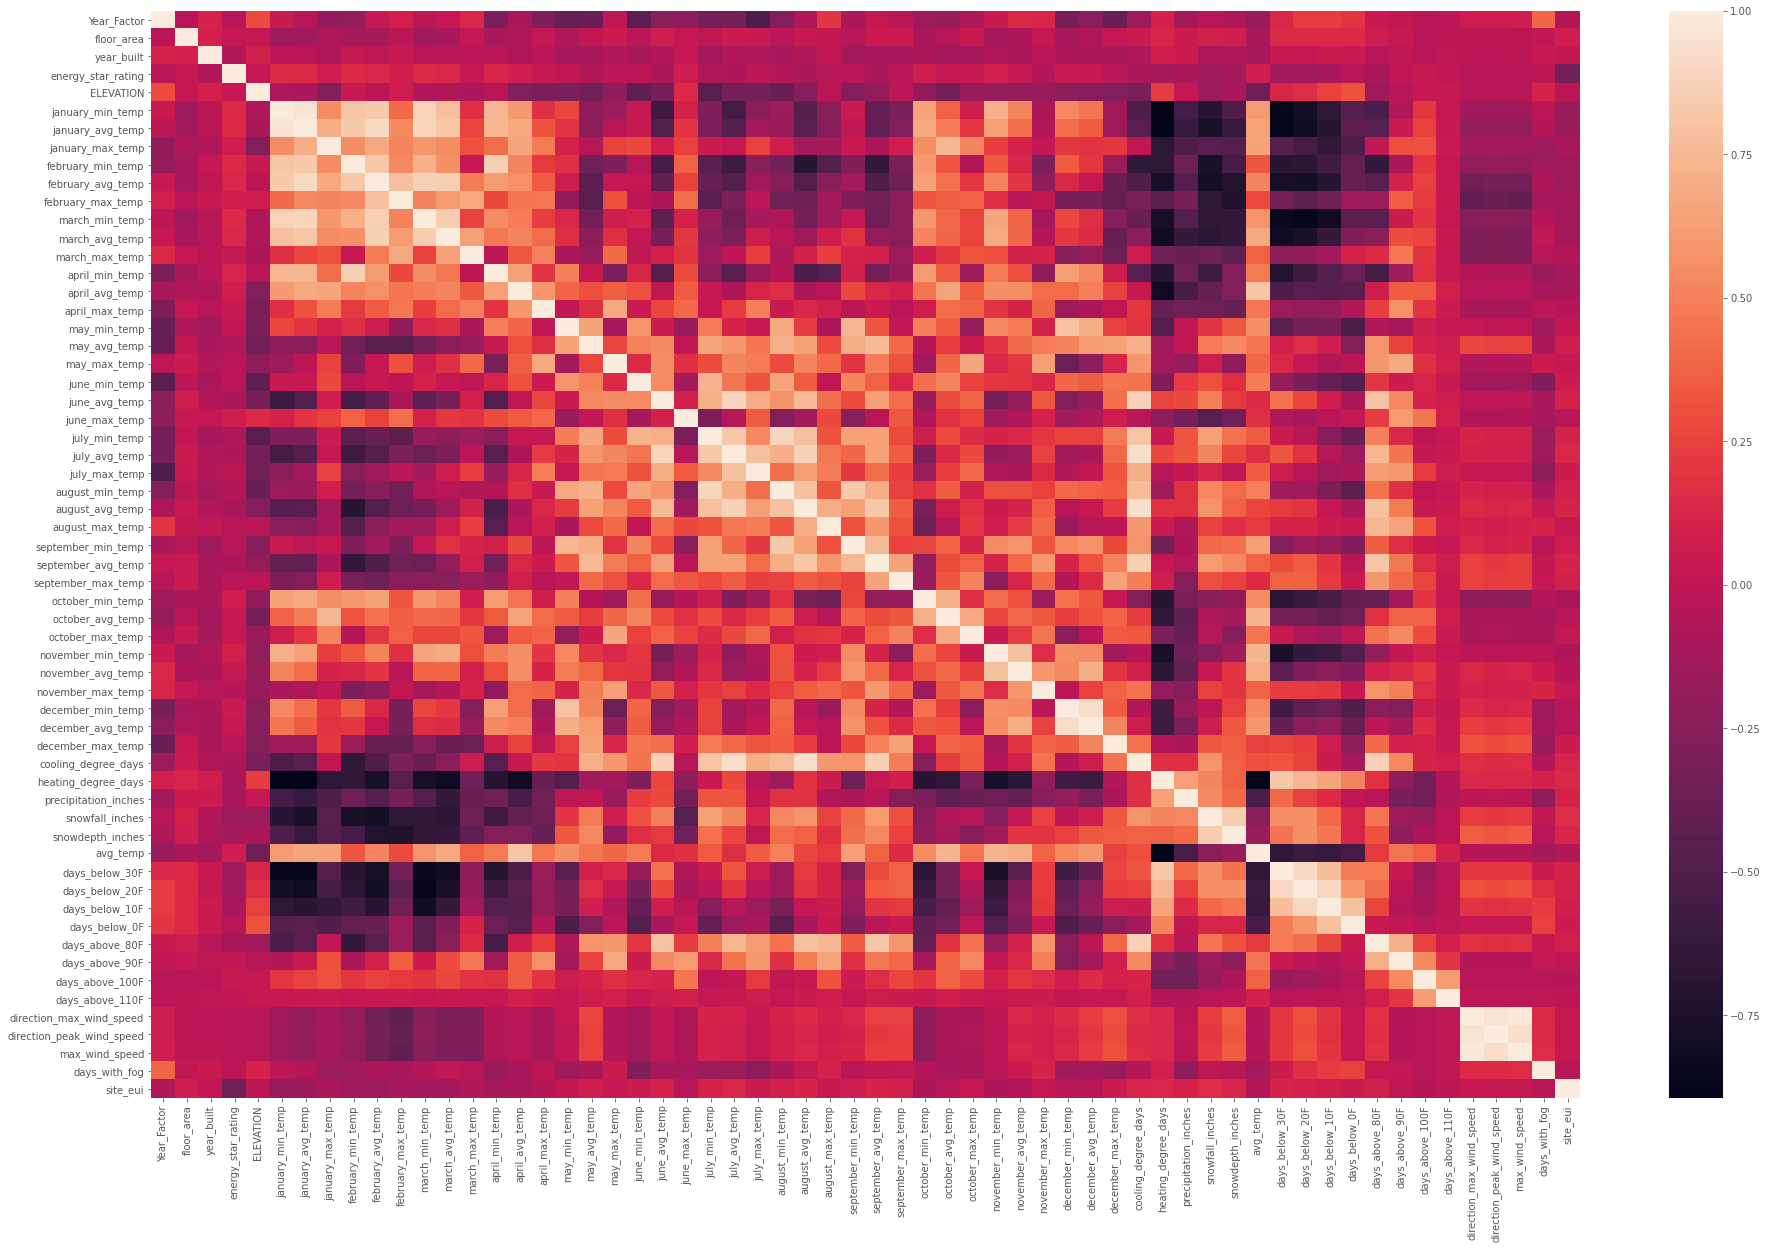

In [60]:
plt.figure(figsize=(32,20))
sns.heatmap(cleaned_data.corr())

- There are multiple independent columns which are highly correlated to each other

### 4.2 Encoding the categorical features

In [61]:
cleaned_ohe = cleaned_data.copy()

cat_f = [feature for feature in cleaned_ohe.columns if cleaned_ohe[feature].dtype == 'O']

for col in cat_f:
    dummies = pd.get_dummies(cleaned_ohe[col], dummy_na=False)
    for ohe_col in dummies:
        cleaned_ohe[f'ohe_{col}_{ohe_col}'] = dummies[ohe_col]

In [62]:
cleaned_ohe.head(2)

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  ...  \
0                  52               64.65                  90  ...   
1                  52               64.65                  90  ...   

   ohe_facility_type_Multifamily_Uncategorized  \
0                                            0   
1                                            0   

   ohe_facility_type_Nursing_Home  \
0                               0   
1                               0   

   ohe_facility_type_Office_Bank_or_other_financial  \
0                                                 0   
1                                                 0   

   ohe_facility_type_Office_Medical_non_diagnostic  \
0                                                0   
1                                                0   

   ohe_facility_type_Office_Mixed_use  ohe_facility_type_Office_Uncategorized  \
0                                   0                                       0   
1                                   0                                       0   

   ohe_facility_type_Parking_Garage  \
0                                 0   
1                                 0   

   ohe_facility_type_Public_Assembly_Drama_theater  \
0                                                0   
1                                                0   

   ohe_facility_type_Public_Assembly_Entertainment_culture  \
0                                                  0         
1                                                  0         

   ohe_facility_type_Public_Assembly_Library  \
0                                          0   
1                                          0   

   ohe_facility_type_Public_Assembly_Movie_Theater  \
0                                                0   
1                                                0   

   ohe_facility_type_Public_Assembly_Other  \
0                                        0   
1                                        0   

   ohe_facility_type_Public_Assembly_Recreation  \
0                                             0   
1                                             0   

   ohe_facility_type_Public_Assembly_Social_meeting  \
0                                                 0   
1                                                 0   

   ohe

In [63]:
cleaned_ohe.drop(['ohe_dataset_test','ohe_dataset_train'],axis=1,inplace=True)

In [64]:
cleaned_te = cleaned_data.copy()

cats = ['State_Factor', 'building_class', 'facility_type']
for col in cats:
    encoder = TargetEncoder()
    cleaned_te[f'te_{col}'] = encoder.fit_transform(cleaned_data[col], cleaned_data['site_eui'])

In [65]:
cleaned_te.head(2)

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016129                83                 43   

   november_avg_temp  november_max_temp  december_min_temp  december_avg_temp  \
0               53.8                 72                 36          49.274194   
1               53.8                 72                 36          49.274194   

   december_max_temp  cooling_degree_days  heating_degree_days  \
0                 71                  115                 2960   
1                 71                  115                 2960   

   precipitation_inches  snowfall_inches  snowdepth_inches   avg_temp  \
0                 16.59              0.0                 0  56.972603   
1                 16.59              0.0                 0  56.972603   

   days_below_30F  days_below_20F  days_below_10F  days_below_0F  \
0               0               0               0              0   
1               0               0               0              0   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        1.0             1.0   

   days_with_fog    site_eui dataset  te_State_Factor  te_building_class  \
0          106.0  248.682615   train        64.220446          84.203693   
1           12.0   26.500150   train        64.220446          84.203693   

   te_facility_type  
0        202.732769  
1         44.371881

In [66]:
cleaned_te.shape

(85462, 67)

### 4.3 Inspecting Multicollinear features

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [68]:
def get_vif(X):
    X_matrix = np.array(X)
    vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    vif_factors =  pd.DataFrame()
    vif_factors['columns'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

X = cleaned_te.drop(columns=['State_Factor','building_class','facility_type','dataset'], axis=1)
vif_factors = get_vif(X)

In [69]:
vif_factors

columns           VIF
0          Year_Factor   1198.590568
1           floor_area      1.584793
2           year_built   2975.680265
3   energy_star_rating      9.962435
4            ELEVATION      2.476044
..                 ...           ...
58       days_with_fog     24.301869
59            site_eui      4.579072
60     te_State_Factor  40971.129886
61   te_building_class   1945.411738
62    te_facility_type     17.942835

[63 rows x 2 columns]

In [70]:
cols_with_large_vif = vif_factors[vif_factors.VIF > 4]['columns']
cols_with_large_vif

0            Year_Factor
2             year_built
3     energy_star_rating
5       january_min_temp
6       january_avg_temp
             ...        
58         days_with_fog
59              site_eui
60       te_State_Factor
61     te_building_class
62      te_facility_type
Name: columns, Length: 61, dtype: object

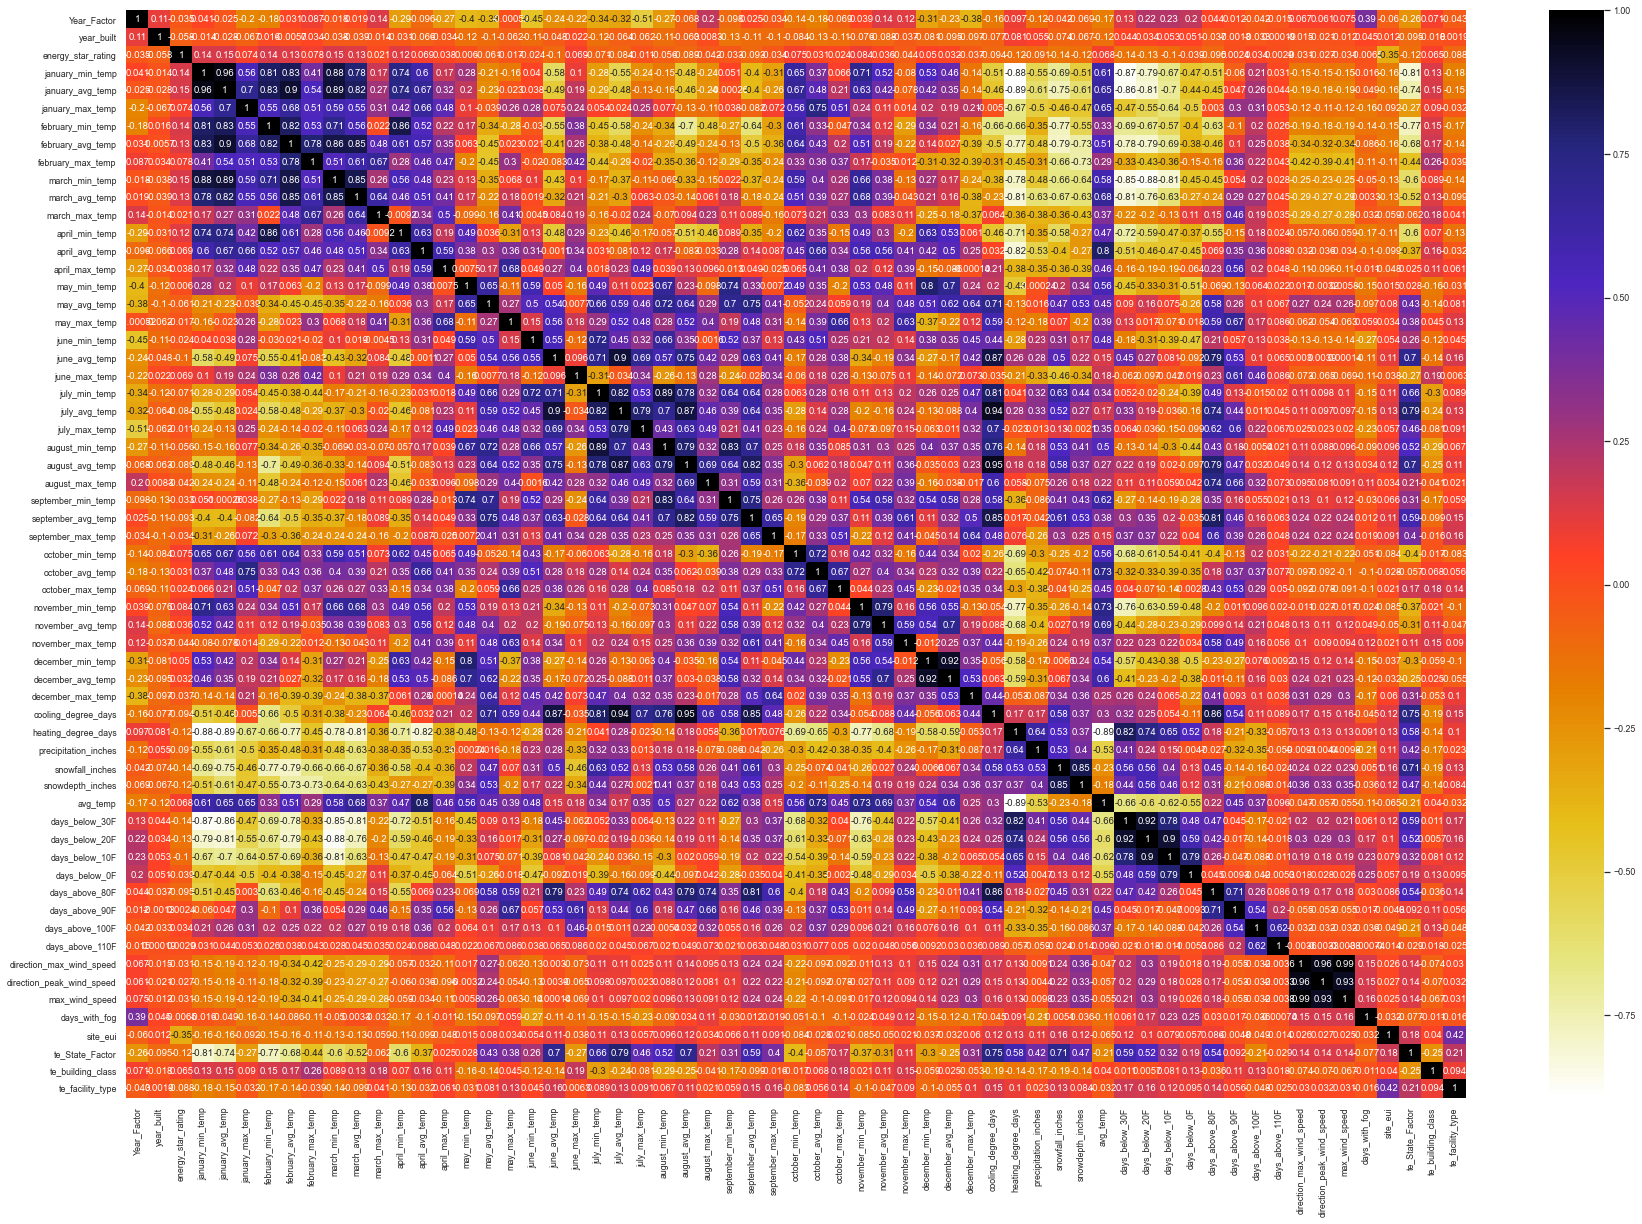

In [71]:
mc_df = cleaned_te[list(cols_with_large_vif)]
plt.figure(figsize=(30,20))
sns.set(font_scale=0.8)
sns.heatmap(mc_df.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Almost all the features are correlated with each other, specially weather and temperature related features

#### 4.3 Feature Engineering

In [72]:
cleaned_te.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  \
0                11.0        2.4                36              50.5   
1                45.0        1.8                36              50.5   
2                97.0        1.8                36              50.5   
3                46.0        1.8                36              50.5   
4               100.0        2.4                36              50.5   

   january_max_temp  february_min_temp  february_avg_temp  february_max_temp  \
0                68                 35          50.589286                 73   
1                68                 35          50.589286                 73   
2                68                 35          50.589286                 73   
3                68                 35          50.589286                 73   
4                68                 35          50.589286                 73   

   march_min_temp  march_avg_temp  march_max_temp  april_min_temp  \
0              40       53.693548              80              41   
1              40       53.693548              80              41   
2              40       53.693548              80              41   
3              40       53.693548              80              41   
4              40       53.693548              80              41   

   april_avg_temp  april_max_temp  may_min_temp  may_avg_temp  may_max_temp  \
0            55.5              78            46     56.854839            84   
1            55.5              78            46     56.854839            84   
2            55.5              78            46     56.854839            84   
3            55.5              78            46     56.854839            84   
4            55.5              78            46     56.854839            84   

   june_min_temp  june_avg_temp  june_max_temp  july_min_temp  july_avg_temp  \
0             50           60.5             90             52      62.725806   
1             50           60.5             90             52      62.725806   
2             50           60.5             90             52      62.725806   
3             50           60.5             90             52      62.725806   
4             50           60.5             90             52      62.725806   

   july_max_temp  august_min_temp  august_avg_temp  august_max_temp  \
0             84               52         62.16129               85   
1             84               52         62.16129               85   
2             84               52         62.16129               85   
3             84               52         62.16129               85   
4             84               52         62.16129               85   

   september_min_temp  september_avg_temp  september_max_temp  \
0                  52               64.65                  90   
1                  52               64.65                  90   
2                  52               64.65                  90   
3                  52               64.65                  90   
4                  52               64.65                  90   

   october_min_temp  october_avg_temp  october_max_temp  november_min_temp  \
0                47         63.016129                83                 43   
1                47         63.016

In [73]:
cleaned_te['Avg_min_temp_winter'] = cleaned_te[['january_min_temp', 'february_min_temp', 'march_min_temp', 
                                     'april_min_temp', 'october_min_temp', 'november_min_temp', 
                                     'december_min_temp']].apply(lambda row: row.mean(), axis=1)

In [74]:
cleaned_te['Avg_max_temp_winter'] = cleaned_te[['january_max_temp', 'february_max_temp', 'march_max_temp', 
                                     'april_max_temp', 'october_max_temp', 'november_max_temp', 
                                     'december_max_temp']].apply(lambda row: row.mean(), axis=1)

In [75]:
cleaned_te['Avg_temp_winter'] = cleaned_te[['january_avg_temp', 'february_avg_temp', 'march_avg_temp', 
                                     'april_avg_temp', 'october_avg_temp', 'november_avg_temp', 
                                     'december_avg_temp']].apply(lambda row: row.mean(), axis=1)

In [76]:
cleaned_te['Avg_temp_summer'] = cleaned_te[['may_avg_temp', 'june_avg_temp', 'july_avg_temp', 
                                     'august_avg_temp', 'september_avg_temp']].apply(lambda row: row.mean(), axis=1)

In [77]:
cleaned_te['Avg_max_summer'] = cleaned_te[['may_max_temp', 'june_max_temp', 'july_max_temp', 
                                     'august_max_temp', 'september_max_temp']].apply(lambda row: row.mean(), axis=1)

In [78]:
cleaned_te['Avg_min_summer'] = cleaned_te[['may_min_temp', 'june_min_temp', 'july_min_temp', 
                                     'august_min_temp', 'september_min_temp']].apply(lambda row: row.mean(), axis=1)

In [79]:
cleaned_te['Avg_days_below30F'] = (cleaned_te['days_below_30F'] + cleaned_te['days_below_20F'] + cleaned_te['days_below_10F'] + cleaned_te['days_below_0F'])/4

In [80]:
cleaned_te['Avg_days_above80F'] = (cleaned_te['days_above_80F'] + cleaned_te['days_above_90F'] + cleaned_te['days_above_100F'] + cleaned_te['days_above_110F'])/4

In [81]:
cols_to_be_dropped = monthly_temp_cols + ['days_below_30F','days_below_20F','days_below_10F','days_below_0F','days_above_80F','days_above_90F','days_above_100F','days_above_110F']

In [82]:
cleaned_te.drop(columns=cols_to_be_dropped,axis=1,inplace=True)

In [83]:
cleaned_te.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  cooling_degree_days  heating_degree_days  \
0                11.0        2.4                  115                 2960   
1                45.0        1.8                  115                 2960   
2                97.0        1.8                  115                 2960   
3                46.0        1.8                  115                 2960   
4               100.0        2.4                  115                 2960   

   precipitation_inches  snowfall_inches  snowdepth_inches   avg_temp  \
0                 16.59              0.0                 0  56.972603   
1                 16.59              0.0                 0  56.972603   
2                 16.59              0.0                 0  56.972603   
3                 16.59              0.0                 0  56.972603   
4                 16.59              0.0                 0  56.972603   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        1.0             1.0   
2                       1.0                        1.0             1.0   
3                       1.0                        1.0             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui dataset  te_State_Factor  te_building_class  \
0          106.0  248.682615   train        64.220446          84.203693   
1           12.0   26.500150   train        64.220446          84.203693   
2           12.0   24.693619   train        64.220446          84.203693   
3           12.0   48.406926   train        64.220446          84.203693   
4          106.0    3.899395   train        64.220446          84.203693   

   te_facility_type  Avg_min_temp_winter  Avg_max_temp_winter  \
0        202.732769            39.714286                 75.0   
1         44.371881            39.714286                 75.0   
2         95.428792            39.714286                 75.0   
3         70.538046            39.714286                 75.0   
4         41.197879            39.714286                 75.0   

   Avg_temp_winter  Avg_temp_summer  Avg_max_summer  Avg_min_summer  \
0        53.767594        61.378387            86.6            50.4   
1        53.767594        61.378387            86.6            50.4   
2        53.767594        61.378387            86.6            50.4   
3        53.767594        61.378387            86.6            50.4   
4        53.767594        61.378387            86.6            50.4   

   Avg_days_below30F  Avg_days_above80F  
0                0.0                3.5  
1                0.0                3.5  
2                0.0                3.5  
3                0.0                3.5  
4                0.0                3.5

In [84]:
cleaned_te['building_area'] = cleaned_te['floor_area'] * cleaned_te['ELEVATION']
cleaned_te['floor_energy_star_rating'] = cleaned_te['energy_star_rating']/cleaned_te['ELEVATION']

In [85]:
cleaned_te.head(2)

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   

   energy_star_rating  ELEVATION  cooling_degree_days  heating_degree_days  \
0                11.0        2.4                  115                 2960   
1                45.0        1.8                  115                 2960   

   precipitation_inches  snowfall_inches  snowdepth_inches   avg_temp  \
0                 16.59              0.0                 0  56.972603   
1                 16.59              0.0                 0  56.972603   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        1.0             1.0   

   days_with_fog    site_eui dataset  te_State_Factor  te_building_class  \
0          106.0  248.682615   train        64.220446          84.203693   
1           12.0   26.500150   train        64.220446          84.203693   

   te_facility_type  Avg_min_temp_winter  Avg_max_temp_winter  \
0        202.732769            39.714286                 75.0   
1         44.371881            39.714286                 75.0   

   Avg_temp_winter  Avg_temp_summer  Avg_max_summer  Avg_min_summer  \
0        53.767594        61.378387            86.6            50.4   
1        53.767594        61.378387            86.6            50.4   

   Avg_days_below30F  Avg_days_above80F  building_area  \
0                0.0                3.5       146980.8   
1                0.0                3.5       493200.0   

   floor_energy_star_rating  
0                  4.583333  
1                 25.000000

In [86]:
X = cleaned_te.drop(columns=['State_Factor','building_class','facility_type','dataset'], axis=1)
vif_factors = get_vif(X)

In [87]:
vif_factors

columns           VIF
0                 Year_Factor  3.679459e+00
1                  floor_area  1.802543e+00
2                  year_built  1.081701e+00
3          energy_star_rating  1.295226e+00
4                   ELEVATION  1.761598e+00
5         cooling_degree_days  5.580720e+02
6         heating_degree_days  1.652315e+03
7        precipitation_inches  5.373215e+00
8             snowfall_inches  1.254401e+01
9            snowdepth_inches  1.396419e+01
10                   avg_temp  1.811402e+06
11   direction_max_wind_speed  1.004019e+02
12  direction_peak_wind_speed  1.390772e+01
13             max_wind_speed  6.467066e+01
14              days_with_fog  1.542753e+00
15                   site_eui  1.417760e+00
16            te_State_Factor  1.274672e+03
17          te_building_class  1.320248e+00
18           te_facility_type  1.311215e+00
19        Avg_min_temp_winter  7.259873e+01
20        Avg_max_temp_winter  1.812137e+01
21            Avg_temp_winter  3.351313e+03
22            Avg_temp_summer  1.218625e+03
23             Avg_max_summer  9.941171e+00
24             Avg_min_summer  2.336871e+01
25          Avg_days_below30F  2.130508e+01
26          Avg_days_above80F  3.096786e+01
27              building_area  2.532934e+00
28   floor_energy_star_rating  1.422670e+00

In [88]:
cols_with_more_vif = vif_factors[vif_factors.VIF > 4]['columns']

In [89]:
cols_with_more_vif

5           cooling_degree_days
6           heating_degree_days
7          precipitation_inches
8               snowfall_inches
9              snowdepth_inches
10                     avg_temp
11     direction_max_wind_speed
12    direction_peak_wind_speed
13               max_wind_speed
16              te_State_Factor
19          Avg_min_temp_winter
20          Avg_max_temp_winter
21              Avg_temp_winter
22              Avg_temp_summer
23               Avg_max_summer
24               Avg_min_summer
25            Avg_days_below30F
26            Avg_days_above80F
Name: columns, dtype: object

<AxesSubplot:>

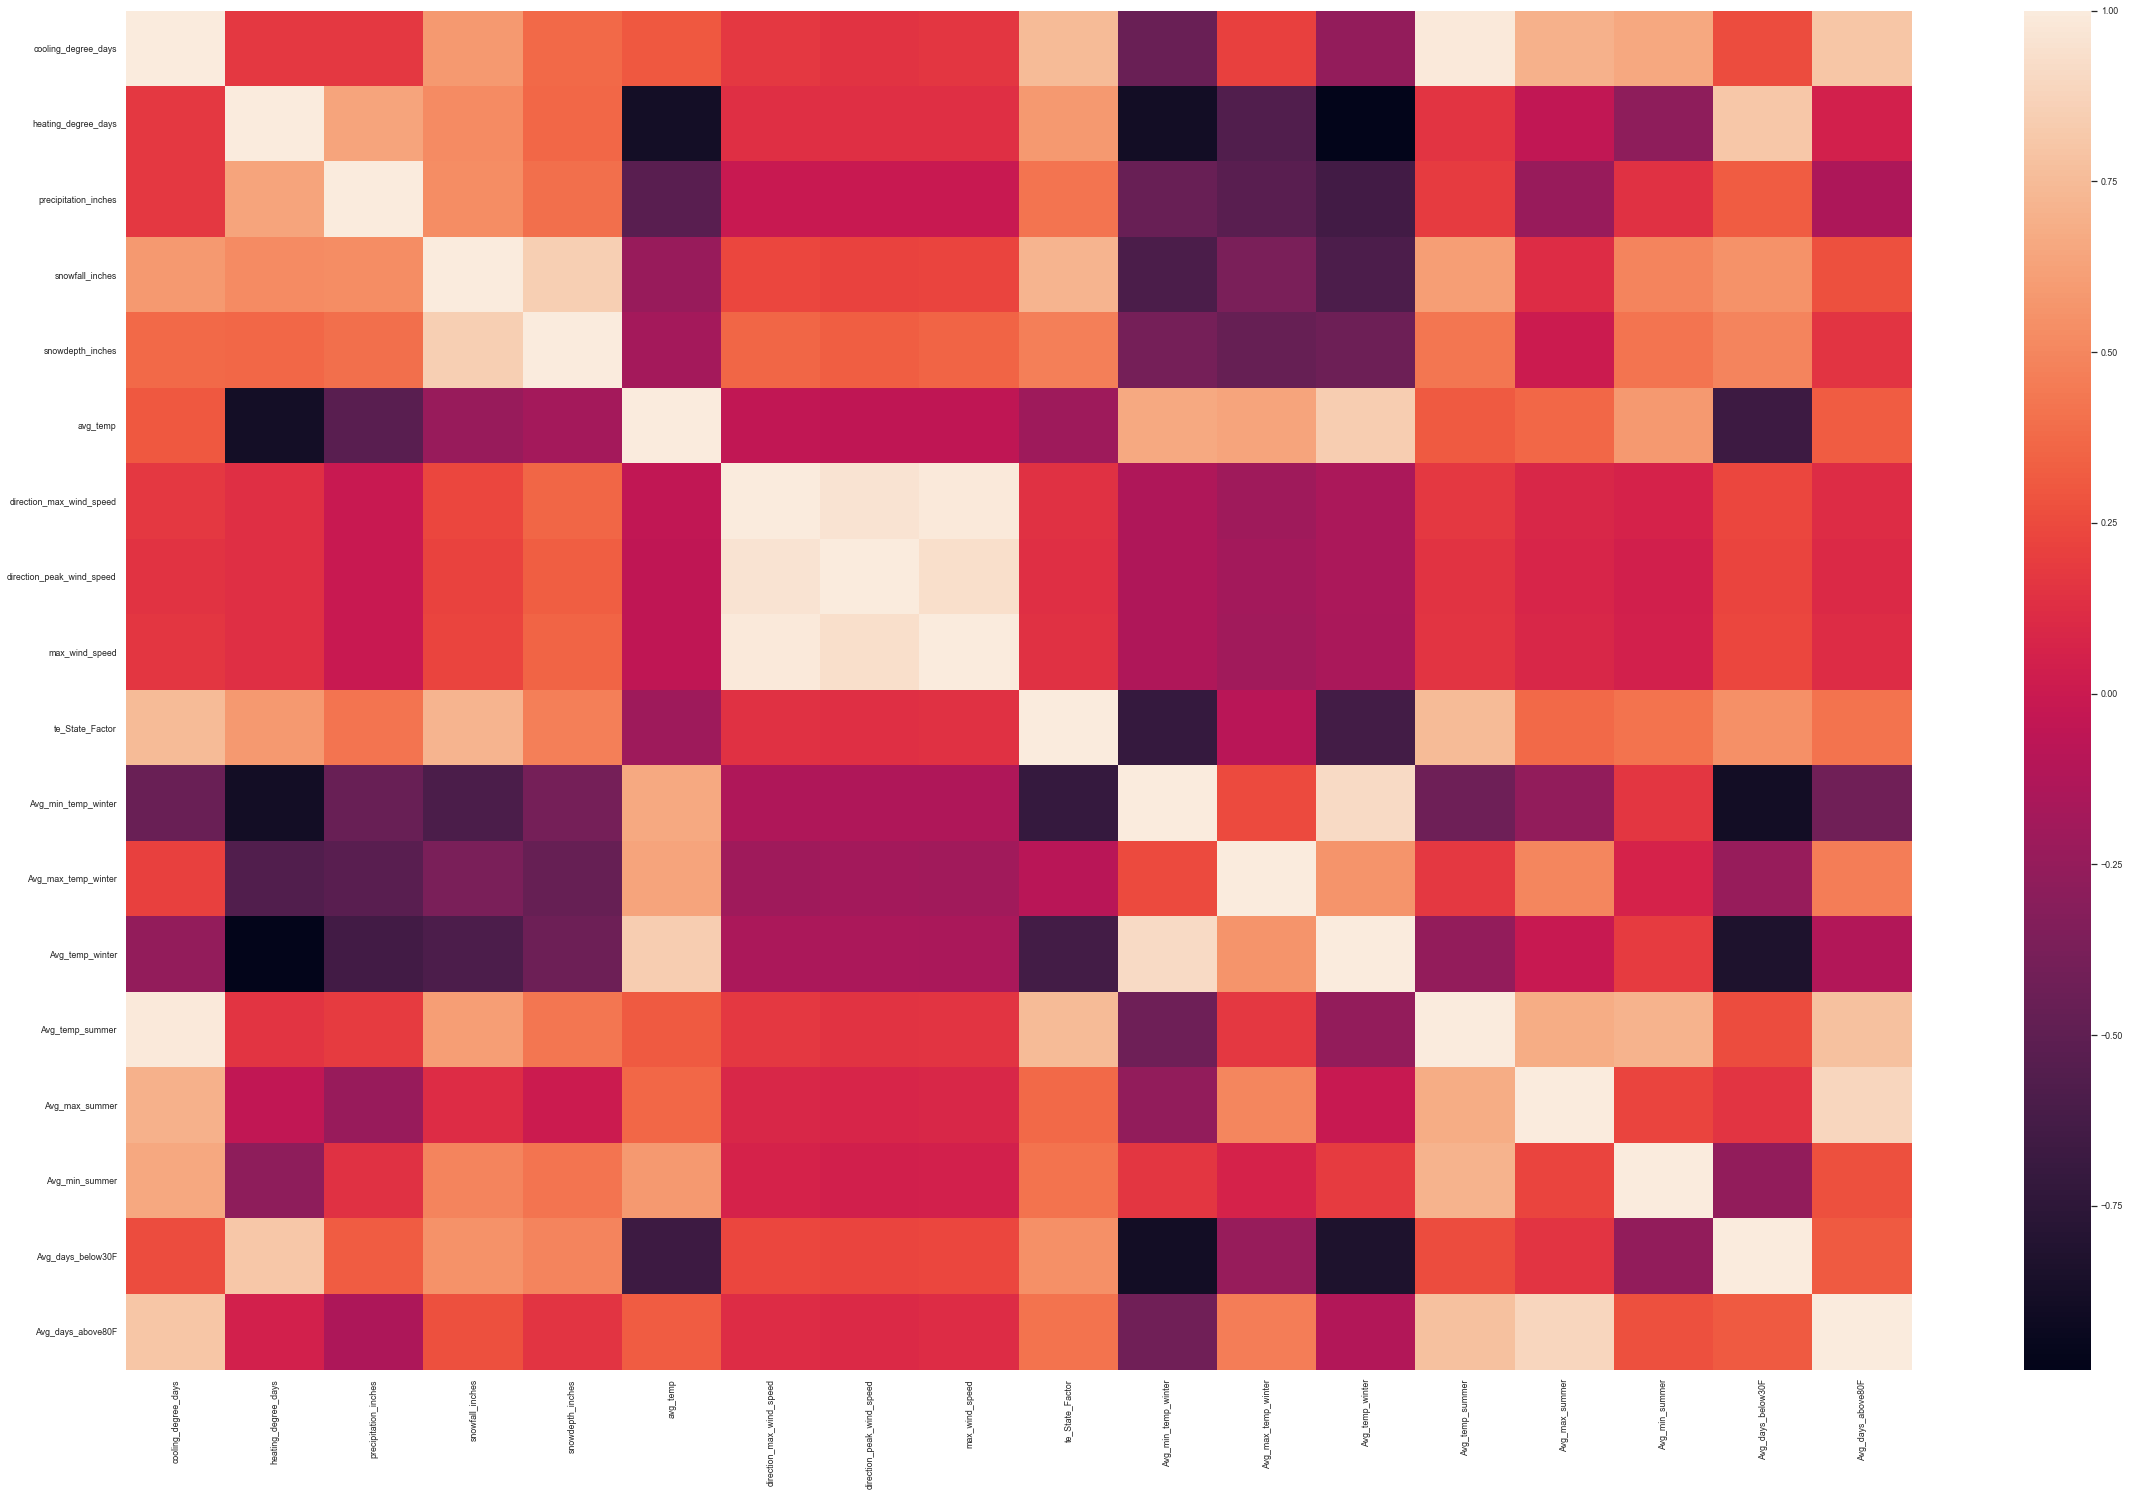

In [90]:
plt.figure(figsize=(40,25))
new_df = cleaned_te[list(cols_with_more_vif)].corr()
sns.set(font_scale=0.8)
sns.heatmap(new_df)

- Multicollinearity is reduced to some extent with feature engineering

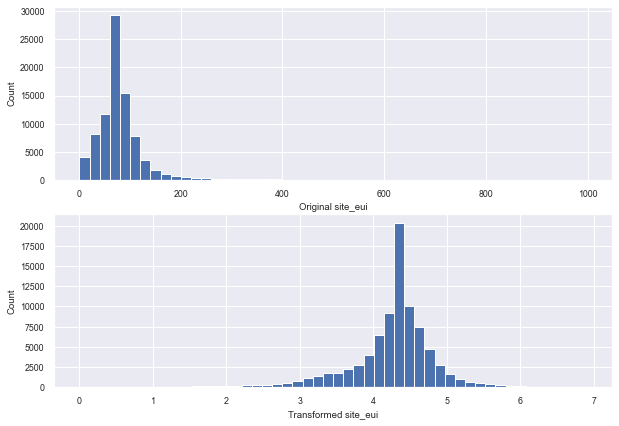

In [91]:
target = 'site_eui'
plt.figure(figsize=(10,7))
# plot the original variable vs sale price    
plt.subplot(2, 1, 1)
cleaned_te[target].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Original ' + target)

# plot transformed variable vs sale price
plt.subplot(2, 1, 2)
np.log(cleaned_te[target]).hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Transformed ' + target);

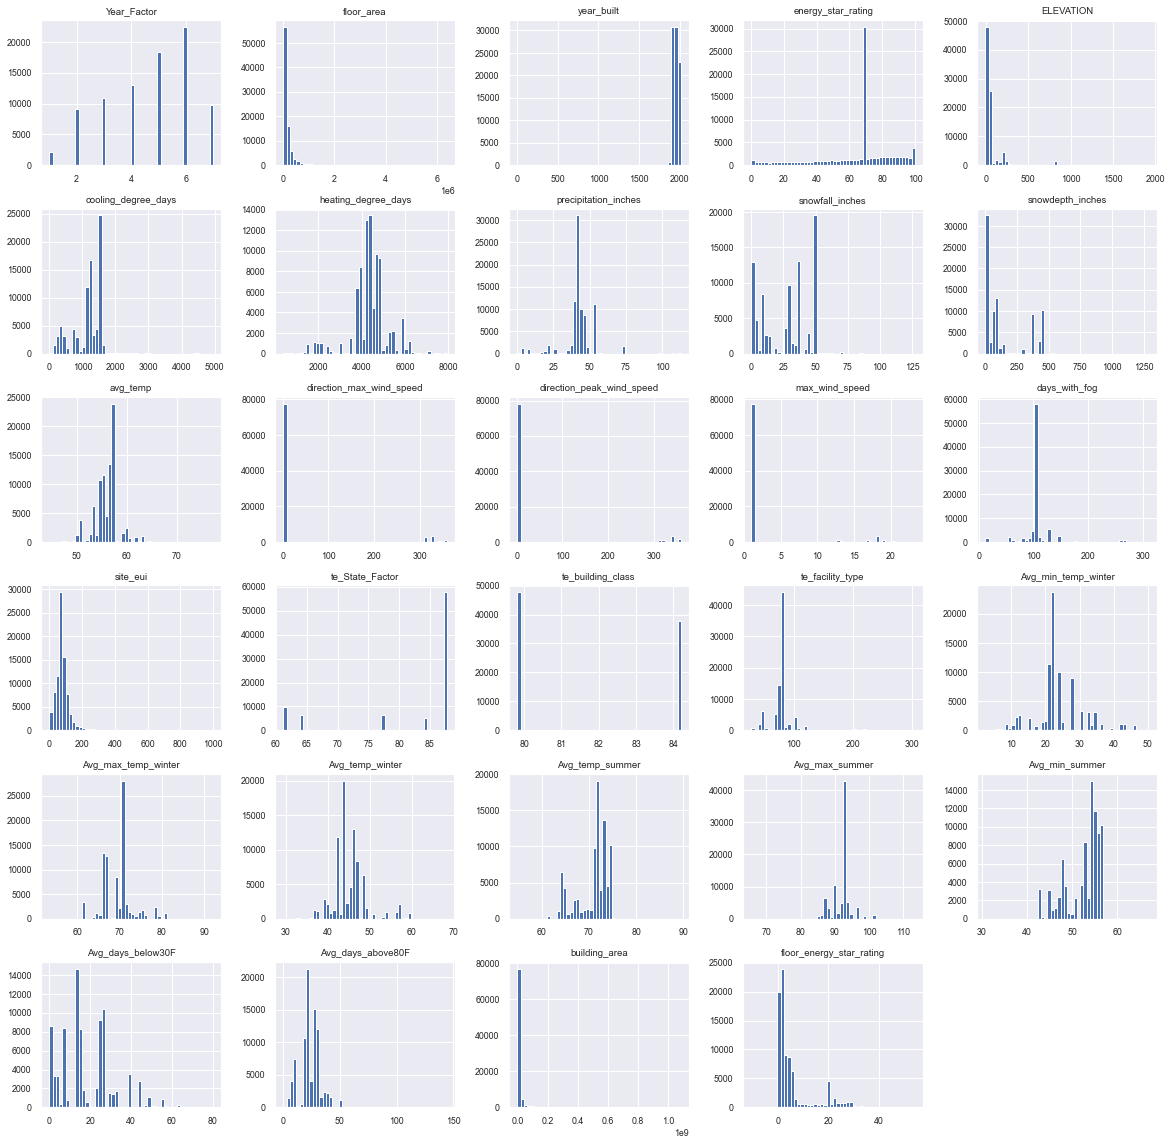

In [92]:
nums = cleaned_te.loc[:, cleaned_te.dtypes != 'object'].columns
cleaned_te[nums].hist(bins=50, figsize=(20,20))
plt.show();

In [93]:
cleaned_te[nums].skew().sort_values(key=abs, ascending=False)[:5]

year_built      -11.842043
building_area    10.887223
floor_area        6.701786
ELEVATION         5.140444
site_eui          5.066008
dtype: float64

In [94]:
cleaned_te.to_pickle('feature_transformed_set_TEonly.pkl')

In [95]:
cleaned_te.drop(['State_Factor','building_class','facility_type'],axis=1,inplace=True)

In [96]:
cleaned_te.shape

(85462, 30)

In [97]:
cleaned_te.head(2)

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0            1     61242.0      1942.0                11.0        2.4   
1            1    274000.0      1955.0                45.0        1.8   

   cooling_degree_days  heating_degree_days  precipitation_inches  \
0                  115                 2960                 16.59   
1                  115                 2960                 16.59   

   snowfall_inches  snowdepth_inches   avg_temp  direction_max_wind_speed  \
0              0.0                 0  56.972603                       1.0   
1              0.0                 0  56.972603                       1.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog    site_eui  \
0                        1.0             1.0          106.0  248.682615   
1                        1.0             1.0           12.0   26.500150   

  dataset  te_State_Factor  te_building_class  te_facility_type  \
0   train        64.220446          84.203693        202.732769   
1   train        64.220446          84.203693         44.371881   

   Avg_min_temp_winter  Avg_max_temp_winter  Avg_temp_winter  Avg_temp_summer  \
0            39.714286                 75.0        53.767594        61.378387   
1            39.714286                 75.0        53.767594        61.378387   

   Avg_max_summer  Avg_min_summer  Avg_days_below30F  Avg_days_above80F  \
0            86.6            50.4                0.0                3.5   
1            86.6            50.4                0.0                3.5   

   building_area  floor_energy_star_rating  
0       146980.8                  4.583333  
1       493200.0                 25.000000

### 5.Baseline Modelling

In [98]:
# typecasting numerical features
for col in cleaned_te.drop(columns=['dataset', 'site_eui']).columns:
    cleaned_te[col] = cleaned_te[col].astype('float64')

In [99]:
cleaned_te.head()

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
0          1.0     61242.0      1942.0                11.0        2.4   
1          1.0    274000.0      1955.0                45.0        1.8   
2          1.0    280025.0      1951.0                97.0        1.8   
3          1.0     55325.0      1980.0                46.0        1.8   
4          1.0     66000.0      1985.0               100.0        2.4   

   cooling_degree_days  heating_degree_days  precipitation_inches  \
0                115.0               2960.0                 16.59   
1                115.0               2960.0                 16.59   
2                115.0               2960.0                 16.59   
3                115.0               2960.0                 16.59   
4                115.0               2960.0                 16.59   

   snowfall_inches  snowdepth_inches   avg_temp  direction_max_wind_speed  \
0              0.0               0.0  56.972603                       1.0   
1              0.0               0.0  56.972603                       1.0   
2              0.0               0.0  56.972603                       1.0   
3              0.0               0.0  56.972603                       1.0   
4              0.0               0.0  56.972603                       1.0   

   direction_peak_wind_speed  max_wind_speed  days_with_fog    site_eui  \
0                        1.0             1.0          106.0  248.682615   
1                        1.0             1.0           12.0   26.500150   
2                        1.0             1.0           12.0   24.693619   
3                        1.0             1.0           12.0   48.406926   
4                        1.0             1.0          106.0    3.899395   

  dataset  te_State_Factor  te_building_class  te_facility_type  \
0   train        64.220446          84.203693        202.732769   
1   train        64.220446          84.203693         44.371881   
2   train        64.220446          84.203693         95.428792   
3   train        64.220446          84.203693         70.538046   
4   train        64.220446          84.203693         41.197879   

   Avg_min_temp_winter  Avg_max_temp_winter  Avg_temp_winter  Avg_temp_summer  \
0            39.714286                 75.0        53.767594        61.378387   
1            39.714286                 75.0        53.767594        61.378387   
2            39.714286                 75.0        53.767594        61.378387   
3            39.714286                 75.0        53.767594        61.378387   
4            39.714286                 75.0        53.767594        61.378387   

   Avg_max_summer  Avg_min_summer  Avg_days_below30F  Avg_days_above80F  \
0            86.6            50.4                0.0                3.5   
1            86.6            50.4                0.0                3.5   
2            86.6            50.4                0.0                3.5   
3            86.6            50.4                0.0                3.5   
4            86.6            50.4                0.0                3.5   

   building_area  floor_energy_star_rating  
0       146980.8                  4.583333  
1       493200.0                 25.000000  
2       504045.0                 53.888889  
3        99585.0                 25.555556  
4       158400.0                 41.666667

In [100]:
train = cleaned_te[cleaned_te['dataset']=='train']
test = cleaned_te[cleaned_te['dataset']=='test']

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


target = train['site_eui'] #y_train

train = train.drop(['dataset', 'site_eui'], axis=1) #X_train
test = test.drop(['dataset', 'site_eui'], axis=1) #X_test

In [101]:
y_test = pd.read_csv('y_test.csv')

X_train = train
X_test = test
y_train = target
y_test = y_test['site_eui']
print('Train: ', X_train.shape)
print('Test:', X_test.shape)
print('Samples: ', y_train.shape)
print('Targets: ', y_test.shape)

Train:  (75757, 28)
Test: (9705, 28)
Samples:  (75757,)
Targets:  (9705,)


In [102]:
train.dtypes

Year_Factor                  float64
floor_area                   float64
year_built                   float64
energy_star_rating           float64
ELEVATION                    float64
cooling_degree_days          float64
heating_degree_days          float64
precipitation_inches         float64
snowfall_inches              float64
snowdepth_inches             float64
avg_temp                     float64
direction_max_wind_speed     float64
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
te_State_Factor              float64
te_building_class            float64
te_facility_type             float64
Avg_min_temp_winter          float64
Avg_max_temp_winter          float64
Avg_temp_winter              float64
Avg_temp_summer              float64
Avg_max_summer               float64
Avg_min_summer               float64
Avg_days_below30F            float64
Avg_days_above80F            float64
building_area                float64
f

### 5.1 Catboost

In [103]:
cats_discrete_idx = np.where(train.dtypes != 'float64')[0]

In [104]:
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100
                        )

In [105]:
catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

y_pred = catb.predict(X_test)

0:	learn: 57.8504081	test: 60.7589800	best: 60.7589800 (0)	total: 1.38s	remaining: 11m 30s
75:	learn: 44.5357725	test: 43.4878620	best: 43.4878620 (75)	total: 28.4s	remaining: 2m 38s
150:	learn: 41.6707676	test: 40.2874477	best: 40.2874477 (150)	total: 56.7s	remaining: 2m 11s
225:	learn: 40.4227634	test: 39.3499721	best: 39.3472468 (224)	total: 1m 22s	remaining: 1m 40s
300:	learn: 39.5638095	test: 38.8059319	best: 38.8059319 (300)	total: 1m 48s	remaining: 1m 11s
375:	learn: 38.9142879	test: 38.5329877	best: 38.5329877 (375)	total: 2m 14s	remaining: 44.3s
450:	learn: 38.3302679	test: 38.2368817	best: 38.2368817 (450)	total: 2m 40s	remaining: 17.5s
499:	learn: 38.0028538	test: 38.1246079	best: 38.1240787 (495)	total: 2m 57s	remaining: 0us

bestTest = 38.12407872
bestIteration = 495

Shrink model to first 496 iterations.


In [106]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 38.12407877634585
 MAE: 21.02230843608712
 MSE: 1453.4453825450241
 R2: 0.5980157583983705


### 5.2 XG Boost

In [107]:
xgb = XGBRegressor(n_estimators=500, reg_alpha=0.01, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [108]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 32.85011188902027
 MAE: 20.508616216225512
 MSE: 1079.1298511211508
 R2: 0.7015414545312801


### 5.3 Random Forest

In [109]:
rf = RandomForestRegressor(random_state=1, criterion='friedman_mse', max_depth = 15, min_samples_split= 2)
rf.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [110]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 32.85011188902027
 MAE: 20.508616216225512
 MSE: 1079.1298511211508
 R2: 0.7015414545312801


### 5.4 Lasso

In [111]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [112]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 44.90584865251046
 MAE: 24.232531945048855
 MSE: 2016.535243202175
 R2: 0.4422801158292077


In [113]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [114]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print(" MAE:", mean_absolute_error(y_test,y_pred))
print(" MSE:", mean_squared_error(y_test,y_pred))
print(" R2:", r2_score(y_test,y_pred))

 Training data scores
 --------------------
 RMSE: 44.997292226655965
 MAE: 24.207758284965315
 MSE: 2024.7563077310735
 R2: 0.44000638856742325


## 6. Model Evaluation

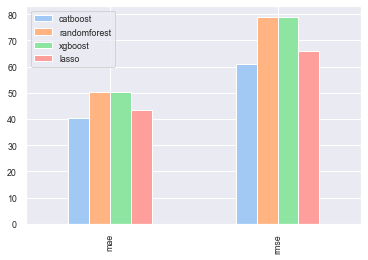

In [115]:
error_rec = {
    "catboost": {
        "mae": 40.29268484855883,
        "rmse": 61.19378120765249,
    },
    "randomforest": {
        "mae": 50.1839889322522,
        "rmse": 79.12972350643851,
    },
    "xgboost": {
         "mae": 50.1839889322522,
        "rmse": 79.12972350643851,
    },
    "lasso": {
         "mae": 43.26164501092259,
        "rmse": 66.08328222674918,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

## 7. Hyperparameter Tuning

### 7.1 Using CrossValidation on CatBoost

In [169]:
# prepaere the out of folds predictions 
train_oof = np.zeros((train.shape[0],))
test_preds = np.zeros(test.shape[0])

NUM_FOLDS = 5
kf = KFold(n_splits = NUM_FOLDS, shuffle=True, random_state=0)


for fold, (train_idx, test_idx) in tqdm.tqdm(enumerate(kf.split(train, target))):
    X_train, X_test = train.iloc[train_idx][test.columns], train.iloc[test_idx][test.columns]
    y_train, y_test = target[train_idx], target[test_idx]
    
    catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)
    # train model
    catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

    oof = catb.predict(X_test)
    train_oof[test_idx] = oof
    test_preds += catb.predict(test)/NUM_FOLDS      
    print(f"out-of-folds prdiction ==== fold_{fold} RMSE",np.sqrt(mean_squared_error(oof, y_test, squared=False)))


0it [00:00, ?it/s]Warning: Overfitting detector is active, thus evaluation metric is calculated on every iteration. 'metric_period' is ignored for evaluation metric.


0:	learn: 57.3868088	test: 59.7280926	best: 59.7280926 (0)	total: 1.53s	remaining: 12m 45s
75:	learn: 44.2557670	test: 47.4877350	best: 47.4877350 (75)	total: 25.5s	remaining: 2m 22s
150:	learn: 41.4638159	test: 45.4626938	best: 45.4626938 (150)	total: 49.2s	remaining: 1m 53s
225:	learn: 40.1817766	test: 44.7167493	best: 44.7167493 (225)	total: 1m 12s	remaining: 1m 28s
300:	learn: 39.3597168	test: 44.3714524	best: 44.3714524 (300)	total: 1m 36s	remaining: 1m 3s
375:	learn: 38.6797382	test: 44.1449650	best: 44.1449650 (375)	total: 2m	remaining: 39.6s
450:	learn: 38.0803300	test: 43.9375960	best: 43.9375960 (450)	total: 2m 23s	remaining: 15.6s
499:	learn: 37.7309505	test: 43.8032675	best: 43.8032675 (499)	total: 2m 38s	remaining: 0us

bestTest = 43.80326749
bestIteration = 499



1it [03:10, 190.49s/it]

out-of-folds prdiction ==== fold_0 RMSE 6.618403695278912


0:	learn: 57.9618417	test: 57.4283727	best: 57.4283727 (0)	total: 532ms	remaining: 4m 25s
75:	learn: 44.6125469	test: 45.4835394	best: 45.4835394 (75)	total: 23.1s	remaining: 2m 8s
150:	learn: 41.5626774	test: 43.6361002	best: 43.6361002 (150)	total: 46.7s	remaining: 1m 47s
225:	learn: 40.1615382	test: 43.1435851	best: 43.1435851 (225)	total: 1m 10s	remaining: 1m 25s
300:	learn: 39.1840965	test: 42.8356103	best: 42.8356103 (300)	total: 1m 34s	remaining: 1m 2s
375:	learn: 38.5197363	test: 42.6758584	best: 42.6758584 (375)	total: 1m 57s	remaining: 38.7s
450:	learn: 37.9042578	test: 42.5419971	best: 42.5419971 (450)	total: 2m 20s	remaining: 15.3s
499:	learn: 37.5208117	test: 42.4522247	best: 42.4518042 (498)	total: 2m 36s	remaining: 0us

bestTest = 42.45180425
bestIteration = 498

Shrink model to first 499 iterations.


2it [05:50, 181.24s/it]

out-of-folds prdiction ==== fold_1 RMSE 6.515504898032262


0:	learn: 58.0113493	test: 57.2464090	best: 57.2464090 (0)	total: 373ms	remaining: 3m 6s
75:	learn: 44.7040302	test: 45.0961666	best: 45.0961666 (75)	total: 24.7s	remaining: 2m 17s
150:	learn: 41.7299151	test: 43.2388078	best: 43.2388078 (150)	total: 49s	remaining: 1m 53s
225:	learn: 40.3334440	test: 42.6642511	best: 42.6642511 (225)	total: 1m 13s	remaining: 1m 29s
300:	learn: 39.4451950	test: 42.4128301	best: 42.4128301 (300)	total: 1m 37s	remaining: 1m 4s
375:	learn: 38.7121311	test: 42.1947771	best: 42.1947771 (375)	total: 2m 4s	remaining: 40.9s
450:	learn: 38.0899442	test: 42.0048303	best: 42.0044349 (447)	total: 2m 32s	remaining: 16.6s
499:	learn: 37.6752962	test: 41.9064959	best: 41.9064959 (499)	total: 2m 51s	remaining: 0us

bestTest = 41.90649594
bestIteration = 499



3it [08:44, 179.12s/it]

out-of-folds prdiction ==== fold_2 RMSE 6.473522690033821


0:	learn: 57.8784956	test: 57.6582554	best: 57.6582554 (0)	total: 473ms	remaining: 3m 56s
75:	learn: 44.4170414	test: 45.6815767	best: 45.6815767 (75)	total: 28.3s	remaining: 2m 37s
150:	learn: 41.3866771	test: 43.9568924	best: 43.9568924 (150)	total: 56.2s	remaining: 2m 9s
225:	learn: 40.0054852	test: 43.4532124	best: 43.4532124 (225)	total: 1m 22s	remaining: 1m 40s
300:	learn: 39.1096432	test: 43.2268314	best: 43.2268314 (300)	total: 1m 50s	remaining: 1m 13s
375:	learn: 38.3728500	test: 43.0720807	best: 43.0720807 (375)	total: 2m 17s	remaining: 45.4s
450:	learn: 37.7300753	test: 42.9642473	best: 42.9638788 (448)	total: 2m 44s	remaining: 17.9s
499:	learn: 37.3803829	test: 42.9089852	best: 42.9089852 (499)	total: 3m 1s	remaining: 0us

bestTest = 42.90898515
bestIteration = 499



4it [11:49, 180.96s/it]

out-of-folds prdiction ==== fold_3 RMSE 6.5504950300721845


0:	learn: 58.0093526	test: 57.2318615	best: 57.2318615 (0)	total: 396ms	remaining: 3m 17s
75:	learn: 44.6909517	test: 45.2152029	best: 45.2152029 (75)	total: 26.7s	remaining: 2m 29s
150:	learn: 41.7407607	test: 43.3700899	best: 43.3700899 (150)	total: 51.3s	remaining: 1m 58s
225:	learn: 40.4133784	test: 42.8458676	best: 42.8458676 (225)	total: 1m 19s	remaining: 1m 36s
300:	learn: 39.5038048	test: 42.6026914	best: 42.6026914 (300)	total: 1m 43s	remaining: 1m 8s
375:	learn: 38.7961414	test: 42.4832395	best: 42.4832395 (375)	total: 2m 8s	remaining: 42.3s
450:	learn: 38.1641983	test: 42.3740262	best: 42.3732065 (449)	total: 2m 32s	remaining: 16.5s
499:	learn: 37.8139088	test: 42.3261791	best: 42.3256816 (498)	total: 2m 47s	remaining: 0us

bestTest = 42.32568155
bestIteration = 498

Shrink model to first 499 iterations.


5it [14:38, 175.78s/it]

out-of-folds prdiction ==== fold_4 RMSE 6.505819059053854


In [174]:
train_oof

array([274.01260877,  40.09643436,  46.51207117, ..., 152.24686134,
       151.78722858,  65.22260806])

###  Using Optuna with Random Forest

In [116]:
kfolds = KFold(n_splits=3, shuffle=True, random_state=42)

# Objective function
def random_forest_objective(trial, data=X_train, target=y_train):
    # Dictionary to store best parameters
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "max_features": trial.suggest_float("max_features", 0.01, 0.95)
    }
     
    model = RandomForestRegressor(**param)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()

In [117]:
def tuner(objective, n=5, direction='minimize'): 
    # Create Study object
    study = optuna.create_study(direction="minimize")

    # Optimize the study
    study.optimize(objective, n_trials=n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [118]:
%%time
rf_param, rf_score = tuner(random_forest_objective,1)
rf_tuned_model = RandomForestRegressor(**rf_param)

[I 2023-05-19 08:44:05,116] A new study created in memory with name: no-name-903e3e97-7304-4a57-b360-3c1b424b3450
[I 2023-05-19 09:03:43,586] Trial 0 finished with value: -42.80529603427355 and parameters: {'n_estimators': 403, 'max_depth': 10, 'min_samples_split': 4, 'max_features': 0.5204985716219389}. Best is trial 0 with value: -42.80529603427355.


Best score: -42.80529603427355
Optimized parameters: {'n_estimators': 403, 'max_depth': 10, 'min_samples_split': 4, 'max_features': 0.5204985716219389}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
Wall time: 19min 38s


In [119]:
rf_tuned_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5204985716219389,
                      min_samples_split=4, n_estimators=403)

## 8. Model Evaluation

Text(0.5, 0, 'iteration')

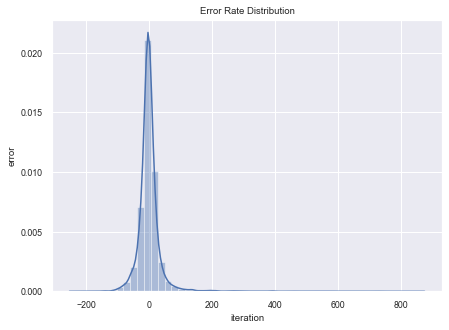

In [176]:
y_hat_tuned = catb.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

Text(0.5, 0, 'iteration')

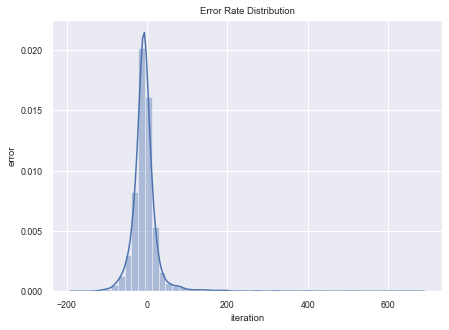

In [120]:
y_hat_tuned = rf_tuned_model.predict(X_test)

plt.figure(figsize = (7,5))
sns.distplot(y_test - y_hat_tuned)
plt.title("Error Rate Distribution");
plt.ylabel("error")
plt.xlabel("iteration")

In [123]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [124]:
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

In [127]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr


In [128]:
X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)

In [146]:
for i in range(len(fs_info.get_feature_names_out())):
    print('Feature %s: %f' % (fs_info.get_feature_names_out()[i], fs_info.scores_[i]))


Feature Year_Factor: 0.200139
Feature floor_area: 0.101708
Feature year_built: 0.065050
Feature energy_star_rating: 0.245289
Feature ELEVATION: 0.164025
Feature cooling_degree_days: 0.379377
Feature heating_degree_days: 0.380599
Feature precipitation_inches: 0.378623
Feature snowfall_inches: 0.376245
Feature snowdepth_inches: 0.376365
Feature avg_temp: 0.379131
Feature direction_max_wind_speed: 0.011437
Feature direction_peak_wind_speed: 0.011732
Feature max_wind_speed: 0.013593
Feature days_with_fog: 0.105178
Feature te_State_Factor: 0.152461
Feature te_building_class: 0.039682
Feature te_facility_type: 0.239822
Feature Avg_min_temp_winter: 0.379862
Feature Avg_max_temp_winter: 0.319287
Feature Avg_temp_winter: 0.379589
Feature Avg_temp_summer: 0.378633
Feature Avg_max_summer: 0.375628
Feature Avg_min_summer: 0.373296
Feature Avg_days_below30F: 0.380599
Feature Avg_days_above80F: 0.366087
Feature building_area: 0.031229
Feature floor_energy_star_rating: 0.160136


In [125]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_)
    plt.xticks(rotation=90)
    plt.show()

Feature Year_Factor: 0.200139
Feature floor_area: 0.101708
Feature year_built: 0.065050
Feature energy_star_rating: 0.245289
Feature ELEVATION: 0.164025
Feature cooling_degree_days: 0.379377
Feature heating_degree_days: 0.380599
Feature precipitation_inches: 0.378623
Feature snowfall_inches: 0.376245
Feature snowdepth_inches: 0.376365
Feature avg_temp: 0.379131
Feature direction_max_wind_speed: 0.011437
Feature direction_peak_wind_speed: 0.011732
Feature max_wind_speed: 0.013593
Feature days_with_fog: 0.105178
Feature te_State_Factor: 0.152461
Feature te_building_class: 0.039682
Feature te_facility_type: 0.239822
Feature Avg_min_temp_winter: 0.379862
Feature Avg_max_temp_winter: 0.319287
Feature Avg_temp_winter: 0.379589
Feature Avg_temp_summer: 0.378633
Feature Avg_max_summer: 0.375628
Feature Avg_min_summer: 0.373296
Feature Avg_days_below30F: 0.380599
Feature Avg_days_above80F: 0.366087
Feature building_area: 0.031229
Feature floor_energy_star_rating: 0.160136


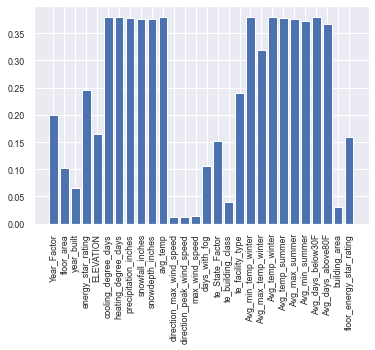

In [126]:
fs_score_plot(fs_info)

Feature Year_Factor: 154.941065
Feature floor_area: 416.747839
Feature year_built: 21.131412
Feature energy_star_rating: 12002.102672
Feature ELEVATION: 10.546275
Feature cooling_degree_days: 1202.547470
Feature heating_degree_days: 1693.234407
Feature precipitation_inches: 989.656613
Feature snowfall_inches: 1921.582835
Feature snowdepth_inches: 986.354263
Feature avg_temp: 607.599711
Feature direction_max_wind_speed: 63.693723
Feature direction_peak_wind_speed: 69.346941
Feature max_wind_speed: 63.871158
Feature days_with_fog: 78.015296
Feature te_State_Factor: 2857.076156
Feature te_building_class: 166.241427
Feature te_facility_type: 21309.019244
Feature Avg_min_temp_winter: 1846.408530
Feature Avg_max_temp_winter: 404.657043
Feature Avg_temp_winter: 1846.882608
Feature Avg_temp_summer: 1276.573368
Feature Avg_max_summer: 239.964510
Feature Avg_min_summer: 405.799770
Feature Avg_days_below30F: 1309.712615
Feature Avg_days_above80F: 247.087266
Feature building_area: 142.803769
Featu

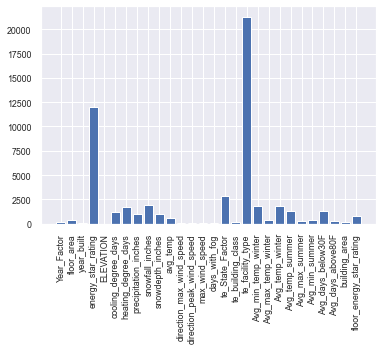

In [129]:
fs_score_plot(fs_corr)

In [139]:
fs_rf = SelectKBest(score_func=mutual_info_regression, k=20)
fs_rf.fit(X_train,y_train)
X_train_rf = fs_rf.transform(X_train)
X_test_rf = fs_rf.transform(X_test)
rf_final = RandomForestRegressor(n_estimators = 403, max_depth = 10, min_samples_split = 4,max_features = 0.5204985716219389, criterion = 'squared_error')

rf_final.fit(X_train_rf, y_train)
rf_pred = rf_final.predict(X_test_rf)

In [140]:
print(mean_absolute_error(y_test,rf_pred))
print(np.sqrt(mean_squared_error(y_test, rf_pred)))

22.964162664169713
41.11274963888762


In [141]:
with open('rf_tunedfinal.joblib', 'wb') as f:
    joblib.dump(rf_final, f, compress=1)

In [143]:
feature_columns = [X_train.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]]
feature_columns

['Year_Factor',
 'energy_star_rating',
 'ELEVATION',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'te_State_Factor',
 'te_facility_type',
 'Avg_min_temp_winter',
 'Avg_max_temp_winter',
 'Avg_temp_winter',
 'Avg_temp_summer',
 'Avg_max_summer',
 'Avg_min_summer',
 'Avg_days_below30F',
 'Avg_days_above80F',
 'floor_energy_star_rating']

## 9. Saving Models

In [178]:
with open('rf_tuned_final.joblib', 'wb') as f:
    joblib.dump(rf_tuned_model, f, compress=1)

with open('catb_best_final.joblib', 'wb') as f:
    joblib.dump(catb,f,compress=3)

In [182]:
with open('rf_tuned_final.joblib', 'rb') as f:
    rf = joblib.load(f)

with open('catb_best_final.joblib', 'rb') as f:
    catb = joblib.load(f)

## 10. Explainable AI

In [179]:
size = 2000

sample_set = X_test.sample(size)
sample_set

Year_Factor  floor_area  year_built  energy_star_rating  ELEVATION  \
14937          1.0     68882.0      1998.0                68.0        3.4   
17894          2.0    169596.0      1927.0                80.0       15.2   
26718          3.0     65916.0      1962.0                68.0       25.6   
58253          6.0    131477.0      1939.0                68.0       42.7   
41105          4.0     73418.0      1988.0                65.0       42.7   
...            ...         ...         ...                 ...        ...   
72459          5.0     57693.0      1988.0                91.0       18.3   
60278          6.0    136385.0      1929.0                76.0       42.7   
5181           6.0   1090157.0      1925.0                91.0       45.7   
2318           4.0    136424.0      1954.0                68.0      438.6   
3000           4.0    328885.0      1970.0                68.0       43.9   

       cooling_degree_days  heating_degree_days  precipitation_inches  \
14937               1331.0               4335.0                 72.81   
17894               1277.0               3978.0                 38.51   
26718               1272.0               4670.0                 46.32   
58253               1489.0               4252.0                 42.17   
41105               1128.0               4875.0                 53.79   
...                    ...                  ...                   ...   
72459                430.0               3742.0                 39.35   
60278               1489.0               4252.0                 42.17   
5181                 142.0               2005.0                 21.39   
2318                2113.0                507.0                  7.40   
3000                 497.0               1477.0                 20.69   

       snowfall_inches  snowdepth_inches   avg_temp  direction_max_wind_speed  \
14937             44.7             418.0  56.519178                       1.0   
17894              9.6              10.0  57.366120                       1.0   
26718             29.6              64.0  55.449315                       1.0   
58253             36.0             101.0  57.215847                       1.0   
41105             50.0             377.0  54.501370                       1.0   
...                ...               ...        ...                       ...   
72459              0.0               0.0  55.693151                       1.0   
60278             36.0             101.0  57.215847                       1.0   
5181               0.0               0.0  59.648907                       1.0   
2318               0.0               0.0  69.157534                       1.0   
3000               0.0               0.0  62.067123                       1.0   

       direction_peak_wind_speed  max_wind_speed  days_with_fog  \
14937                        1.0             1.0           12.0   
17894                        1.0             1.0          106.0   
26718                        1.0             1.0           93.0   
58253                        1.0             1.0          131.0   
41105                        1.0             1.0          106.0   
...                          ...             ...            ...   
72459                        1.0             1.0          106.0   
60278                        1.0             1.0          131.0   
5181                         1.0             1.0          106.0   
2318                         1.0             1.0          106.0   
3000                         1.0             1.0          106.0   

       te_State_Factor  te_building_class  te_facility_type  \
14937        87.481012          79.815538         83.425312   
17894        87.481012          84.203693         76.837599   
26718        87.481012          79.815538         83.425312   
58253        87.481012          79.815538         83.425312   
41105        87.481012          79.815538         83.425312   
...                ...                ...        

In [180]:
shap_values = shap.TreeExplainer(rf).shap_values(sample_set)

In [181]:
shap.initjs()

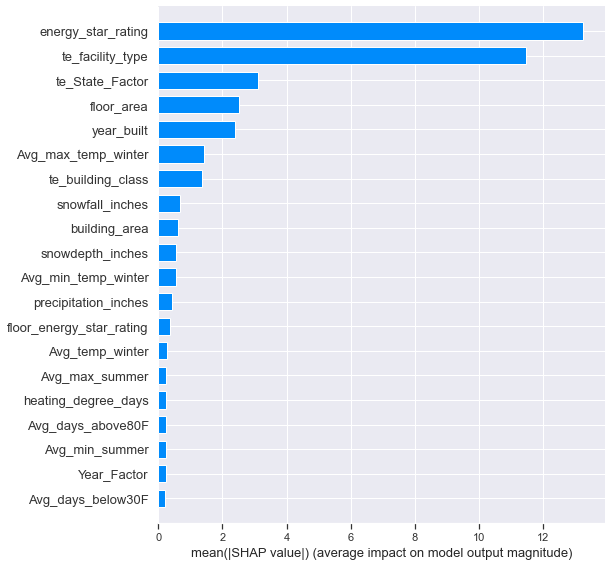

In [183]:
shap.summary_plot(shap_values, sample_set, plot_type="bar")

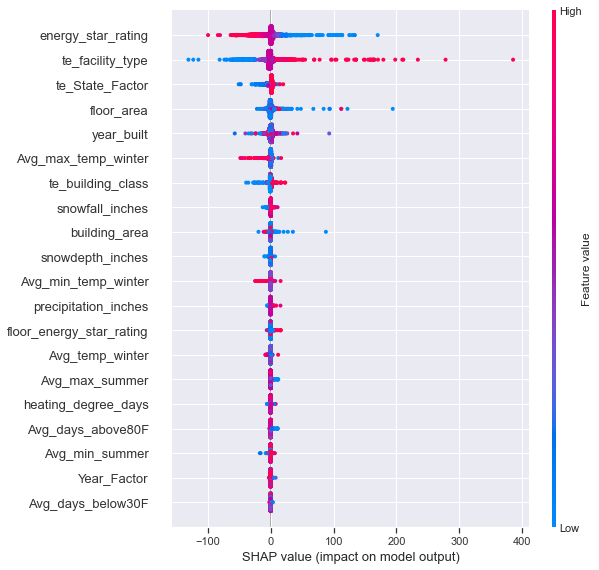

In [184]:
shap.summary_plot(shap_values, sample_set)

In [185]:
limit = 200
shap.force_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], shap_values[0:limit,:], sample_set.iloc[0:limit,:])

In [188]:
row = 60
print(y_pred[row])
shap.initjs()
shap.force_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], shap_values[row], sample_set.iloc[row])

209.72191504340853


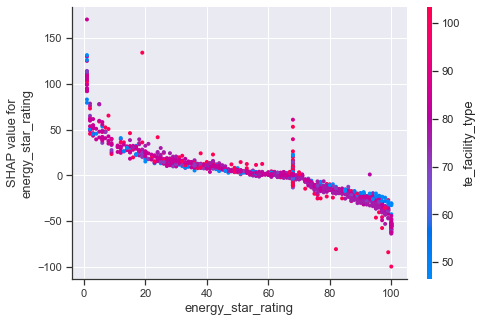

In [189]:
shap.dependence_plot('energy_star_rating', shap_values, sample_set)

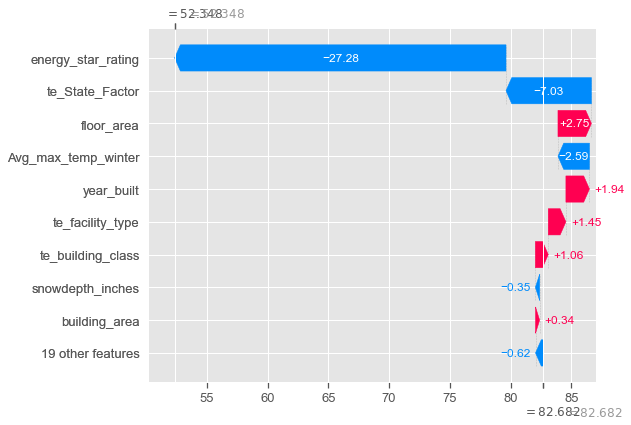

In [259]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf_tuned_model).expected_value[0], 
                                       shap_values[row],
                                       feature_names=sample_set.columns.tolist()
                                      )

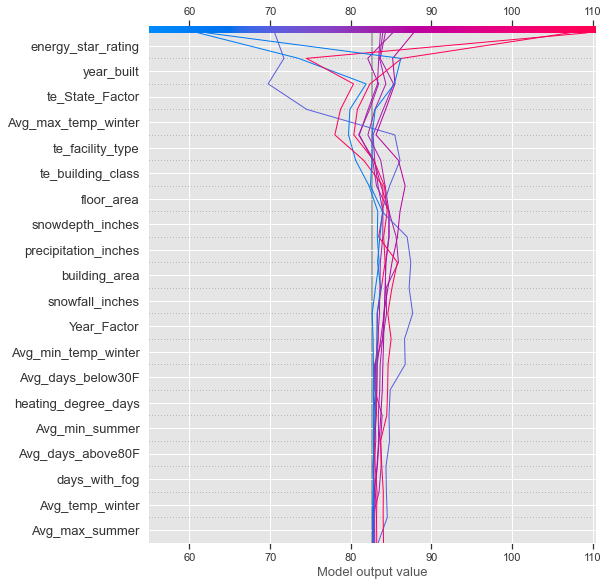

In [260]:
start = 120
limit = 130

shap.decision_plot(shap.TreeExplainer(rf_tuned_model).expected_value[0], 
                   shap_values[start:limit], 
                   feature_names=sample_set.columns.tolist())